In [1336]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)
import datetime as dt
import seaborn as sns
import plotly.express as px

In [1337]:
# Read loan data from CSV file

df = pd.read_csv("loan.csv")

/Users/veniladri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



In [1338]:
# Shape of data

print ('Total number of loan applicants - ', df.shape[0])

Total number of loan applicants -  39717


# Data Cleaning

As a part of pre-processing step, let's perform some data cleaning activity, remove outliers if any and fill the data from reliable sources.
- Remove rows containing missing values
- Remove outliers
- Extract useful information and drop columns if not required

### Dropping duplicate rows

In [1339]:
print ('Rows before dropping - ', df.shape[0])
df.drop_duplicates(inplace=True)
print ('Rows after dropping - ', df.shape[0])

Rows before dropping -  39717
Rows after dropping -  39717


### Cleaning dataset containing missing or irrelevant values

In [1340]:
# Clean dataset if all the values of a variable contains NaN

df.dropna(axis=1, 
          inplace=True, 
          how='all')

In [1341]:
print ('Shape of data frame - ', df.shape)

Shape of data frame -  (39717, 57)


This analysis will be useful when lending club gets the loan application from the borrowers and decide whether to approve the loan of reject it. The following columns are irrelevant columns for our analysis since those are obtained after the loan has been approved or rejected. We won't be having these values during the pre-processing step of loan approval.

- funded_amnt
- funded_amnt_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- out_prncp
- out_prncp_inv


In [1342]:
# Dropping the above mentioned columns

df.drop(['funded_amnt',
         'funded_amnt_inv',
         'total_pymnt',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_rec_int',
         'total_rec_late_fee',
         'recoveries',
         'collection_recovery_fee',
         'last_pymnt_d',
         'last_pymnt_amnt',
         'last_credit_pull_d', 
         'out_prncp', 
         'out_prncp_inv'], 
        inplace=True, axis=1)


### loan_status

Different unique types of loan status recorded by LC

In [1343]:
print ('Loan status: ', df['loan_status'].unique())

Loan status:  ['Fully Paid' 'Charged Off' 'Current']


To study the customers, we will only be interested in "*Fully Paid*" and "*Charged Off*" loan statuses. Since "*Current*" loan statuses are those who are yet to complete their loan tenure.

In [1344]:
# Finding borrowers who are in their loan tenure
current_loan_applicants = df[ df['loan_status'] == 'Current' ].shape[0]

print ("Number of loan applicants yet to complete their loan tenure = ", current_loan_applicants)

Number of loan applicants yet to complete their loan tenure =  1140


In [1345]:
# Assigning only "Fully Paid" and "Charged Off" loan applicant for analysis

df = df[ df['loan_status'] != 'Current' ]

### grade, sub_grade

In [1346]:
print ('Loan grades: ', df['grade'].unique())
print ('Loan subgrades: ', df['sub_grade'].unique())

Loan grades:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Loan subgrades:  ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']


### term

Lending club offers loans only for a tenure of either 3 years or 5 years. Let's check the tenure from given data

In [1347]:
print ('Loan tenure: ', df['term'].unique())

Loan tenure:  [' 36 months' ' 60 months']


In [1348]:
# Convert term values to integer (36 and 60)

df['term'] = df['term'].str.rstrip(' months')
df['term'] = df['term'].astype('int64')

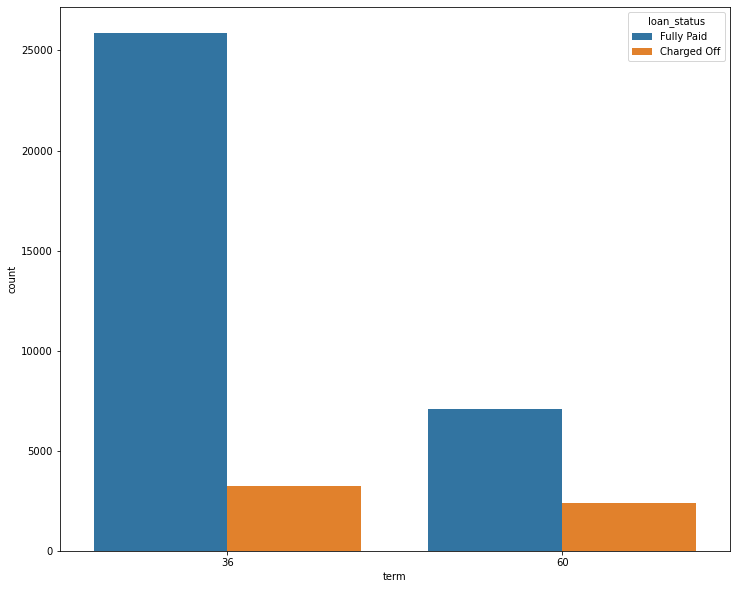

In [1349]:
# Observe the count of loans issued based on loan term

sns.countplot(data=df, 
              x='term', 
              hue='loan_status')
plt.show()

### issue_d

The data provided contains the loan data issued for the years 2007-2011

In [1350]:
# Deriving the loan issue year using datetime stptime method
df['issue_year'] = df['issue_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y').year)

print ('Loan issue years: ', df['issue_year'].unique())

Loan issue years:  [2011 2010 2009 2008 2007]


In [1351]:
# Calculating count of loan applicants for the loans issued each year

yearly_loan_status = pd.pivot_table(data=df, 
                                    columns=df["loan_status"], 
                                    index=df["issue_year"], 
                                    values="issue_year", 
                                    fill_value=0, 
                                    aggfunc=len)

yearly_loan_status

loan_status  Charged Off  Fully Paid
issue_year                          
2007                  45         206
2008                 247        1315
2009                 594        4122
2010                1485       10047
2011                3256       17260

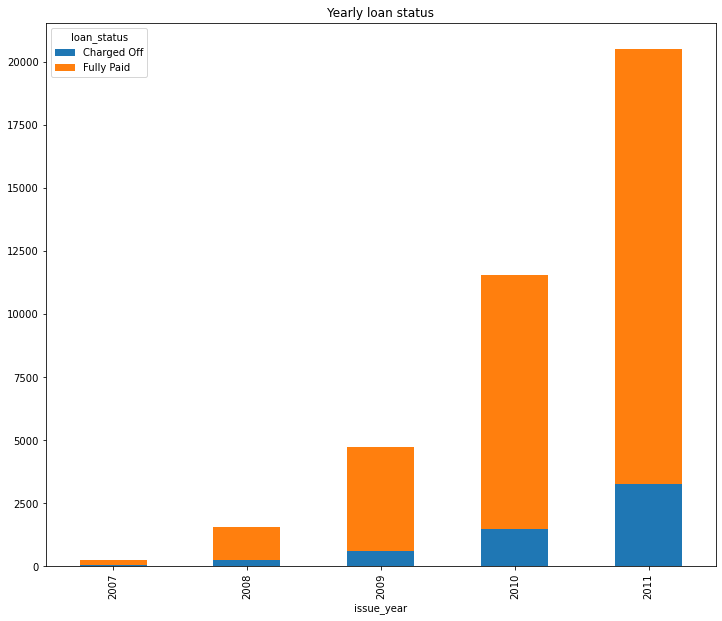

In [1352]:
# Visualising the yearly loan status

yearly_loan_status.plot(kind="bar", 
                        stacked=True, 
                        title="Yearly loan status")

plt.show()

In [1353]:
# Percentage of loan applicants in each loan status category
absolute_yearly_loan_status = yearly_loan_status[['Charged Off', 'Fully Paid']].apply(lambda x: 100*x/x.sum(), axis=1)

absolute_yearly_loan_status

loan_status  Charged Off  Fully Paid
issue_year                          
2007           17.928287   82.071713
2008           15.813060   84.186940
2009           12.595420   87.404580
2010           12.877211   87.122789
2011           15.870540   84.129460

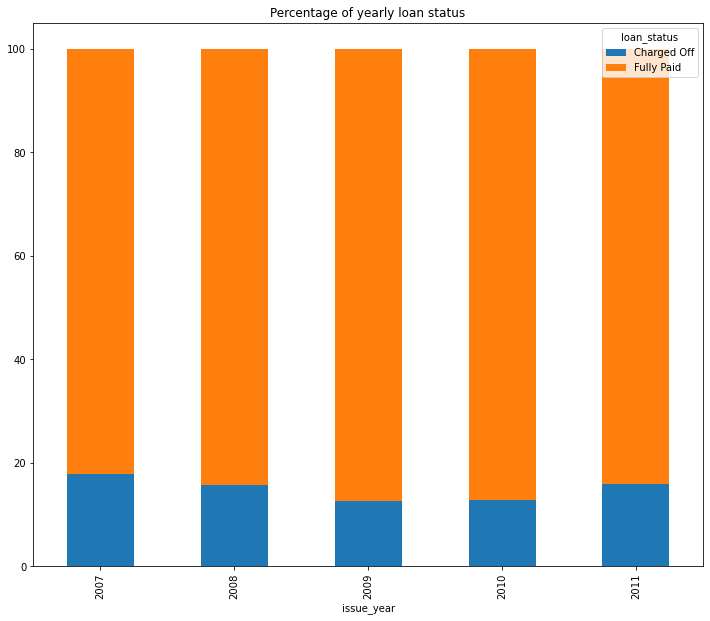

In [1354]:
# Visualising the counts using barplot

absolute_yearly_loan_status.plot(kind="bar", 
                                 stacked=True, 
                                 title="Percentage of yearly loan status")

plt.show()

**There isn't much difference do we see in the different types of loan applications across the loan issue year.** 
From the plot above, we can observe that the proportion of charged off loan applicants in the years 2007-2011 is almost the same. We can continue to drop this column.

In [1355]:
# Dropping the columns issue_d and issue_year

df.drop(['issue_d', 'issue_year'], 
        axis=1, 
        inplace=True)

### emp_title

In [1356]:
# Finding rows having empty employee title

df [df['emp_title'].isnull() == True].shape[0]

2386

Let's see if this column has any importance to our data analysis

In [1357]:
# Count of unique employee titles in the dataset

df['emp_title'].nunique()

28027

Since there are too many employee titles present in the data, we cannot categorise it into another variable to analyse the loan applicant. We can remove this column.

In [1358]:
# Dropping the column emp_title

df.drop('emp_title', 
        axis=1, 
        inplace=True)

### title , purpose, desc

In [1359]:
# Unique list of loan title values

df['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [1360]:
# Count of each loan categories in normalised form

df['purpose'].value_counts(normalize=True)

debt_consolidation    0.468025
credit_card           0.130311
other                 0.100189
home_improvement      0.074526
major_purchase        0.055733
small_business        0.045468
car                   0.038857
wedding               0.024004
medical               0.017653
moving                0.014931
vacation              0.009721
house                 0.009513
educational           0.008425
renewable_energy      0.002644
Name: purpose, dtype: float64

Looks like purpose column is a parent category for title. Dropping title column as that won't be of much use if we have the purpose column

In [1361]:
# Dropping the column title

df.drop('title', 
        axis=1, 
        inplace=True)

In [1362]:
# Dropping desc column as well as it is basically the data entered by the cutomer 

df.drop('desc', 
        axis=1, 
        inplace=True)

### application_type

In [1363]:
# Count of unique application types in the dataset

df['application_type'].value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

Dropping this column as there is no other cateorical value to compare and this has no importance to our analysis

In [1364]:
# Dropping the column application_type

df.drop('application_type', 
        axis=1, 
        inplace=True)

### chargeoff_within_12_mths

In [1365]:
# Count of unique column values in the dataset

df['chargeoff_within_12_mths'].value_counts()

0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

In [1366]:
# Dropping the column chargeoff_within_12_mths

df.drop('chargeoff_within_12_mths', 
        axis=1, 
        inplace=True)

### emp_length

In [1367]:
# Unique list of values under emp_length

df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

Let's check the number of charged off loan applications in each of the above employee tenures

In [1368]:
# Finding the count of borrowers under different employment length categorised into different loan statuses

df_emp_length_data = pd.pivot_table(data=df, 
                                    index=df['emp_length'], 
                                    columns=df['loan_status'], 
                                    values='emp_length', 
                                    aggfunc='count')
df_emp_length_data

loan_status  Charged Off  Fully Paid
emp_length                          
1 year               456        2713
10+ years           1331        7157
2 years              567        3724
3 years              555        3457
4 years              462        2880
5 years              458        2736
6 years              307        1861
7 years              263        1448
8 years              203        1232
9 years              158        1068
< 1 year             639        3869

In order to infer something from the above data, we need to calculate the absolute values of count or percentage of data under each loan status. 

In [1369]:
# Finding the proportional value of counts
df_emp_length_data_abs = df_emp_length_data[['Charged Off', 'Fully Paid']].apply(lambda x: 100*x/x.sum(), axis=1)

df_emp_length_data_abs

loan_status  Charged Off  Fully Paid
emp_length                          
1 year         14.389397   85.610603
10+ years      15.680961   84.319039
2 years        13.213703   86.786297
3 years        13.833500   86.166500
4 years        13.824057   86.175943
5 years        14.339386   85.660614
6 years        14.160517   85.839483
7 years        15.371128   84.628872
8 years        14.146341   85.853659
9 years        12.887439   87.112561
< 1 year       14.174800   85.825200

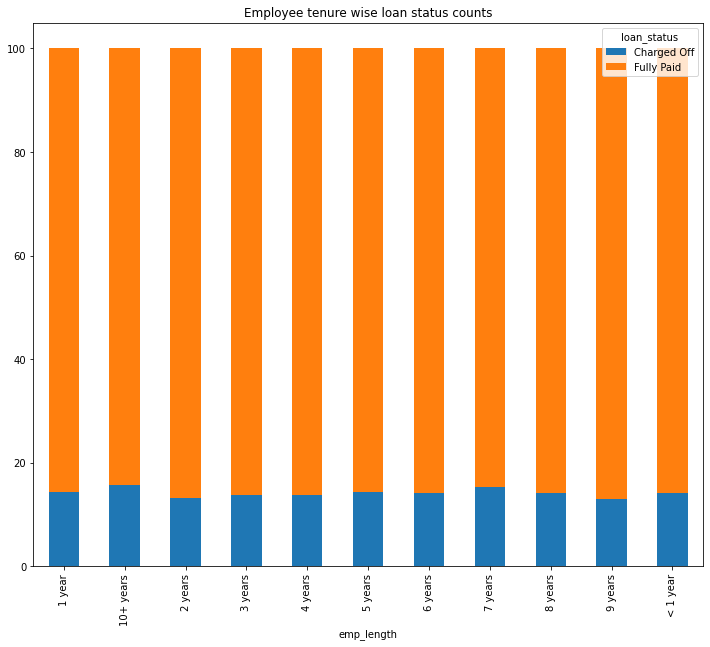

In [1370]:
# Plotting a stacked bar plot to visualise the distribution

df_emp_length_data_abs.plot(kind="bar", 
                            stacked=True, 
                            title="Employee tenure wise loan status counts")
plt.show()

We can drop this column since the proportion of charged off loan applicant count across different employee tenure is same.

In [1371]:
# Dropping the column emp_length

df.drop('emp_length', 
        axis=1, 
        inplace=True)

### pub_rec_bankruptcies

In [1372]:
# Count of unique column values for pub_rec_bankruptcies in the dataset

df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [1373]:
# Calculating the missing values for pub_rec_bankruptcies
missing_values_pub_rec_bankruptcies = df['pub_rec_bankruptcies'].isna().sum()
print (missing_values_pub_rec_bankruptcies)

# Finding the percentage of missing values
perc_miss_val_pub_rec_bankruptcies = missing_values_pub_rec_bankruptcies/df.shape[0] * 100
print (perc_miss_val_pub_rec_bankruptcies)

697
1.8067760582730643


Since the missing rows account for only **1.76%** of the total data, we can remove these rows

In [1374]:
df = df[-df['pub_rec_bankruptcies'].isna()]
print ('Total number of loan applications = ', df.shape[0])

Total number of loan applications =  37880


### tax_liens

In [1375]:
# Count of unique column values for tax_liens in the dataset

df['tax_liens'].value_counts()

0.0    37880
Name: tax_liens, dtype: int64

In [1376]:
# Dropping the column tax_liens

df.drop('tax_liens', 
        axis=1, 
        inplace=True)

### zip_code

In [1377]:
# Check the top 5 values for zip code column

df['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
5    852xx
Name: zip_code, dtype: object

Dropping this column as well since the value is masked and is of no importance to our data analysis

In [1378]:
# Dropping the column zip_code

df.drop('zip_code', 
        axis=1, 
        inplace=True)

### url

Dropping this attribute as well

In [1379]:
# Dropping the column url

df.drop('url', 
        axis=1, 
        inplace=True)

### revol_util

In [1380]:
# Finding the number of rows containing NA for revol_util

df['revol_util'].isna().sum()

50

In [1381]:
# Finding the percentage of rows containing missing values for revol_util

df['revol_util'].isna().sum()/df.shape[0] * 100

0.13199577613516367

Since revol_util or *revolving line of credit utilisation* is an important factor creditors use to decide whether to lend money or not, having NA in these values won't be of much help to our analysis. We shall remove those rows. Such rows accounts for only **0.12%** of the total data.

In [1382]:
# Dropping the rows which contains missing values of revol_util

df = df[df['revol_util'].isna() == False]

**Sanitising revol_util**

In [1383]:
# Removing % symbol from the right and casting the value to float64

df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float64')/100

### int_rate

In [1384]:
# Interest rate
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [1385]:
# Let's remove the % symbol
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float64')/100
df['int_rate'].head()

0    0.1065
1    0.1527
2    0.1596
3    0.1349
5    0.0790
Name: int_rate, dtype: float64

### initial_list_status

In [1386]:
# Count of unique column values for initial_list_status in the dataset

df['initial_list_status'].value_counts()

f    37830
Name: initial_list_status, dtype: int64

Dropping this column as we have only 1 value throughout the data

In [1387]:
# Dropping the initial_list_status url

df.drop('initial_list_status', 
        axis=1, 
        inplace=True)

### next_pymnt_d

This columns won't be of use to us since our objective is to analyse the borrowers who defaulted on their loans already whatever be the next scheduled payment date. 

In [1388]:
# Dropping the next_pymnt_d url

df.drop('next_pymnt_d', 
        axis=1, 
        inplace=True)

### policy_code

In [1389]:
# Count of unique column values for policy_code in the dataset

df['policy_code'].value_counts()

1    37830
Name: policy_code, dtype: int64

Let's drop this column as well since entire dataset has the value of 1 for policy_code

In [1390]:
# Dropping the policy_code url

df.drop('policy_code', 
        inplace=True, 
        axis=1)

### pymnt_plan

In [1391]:
# Count of unique column values for pymnt_plan in the dataset

df['pymnt_plan'].value_counts()

n    37830
Name: pymnt_plan, dtype: int64

Since none of the loan applications have any payment plan allocated, we can drop this column.

In [1392]:
# Dropping the pymnt_plan url

df.drop('pymnt_plan', 
        inplace=True, 
        axis=1)

---

### Checking the number of null and non-null entries in the data frame

Let's follow the below thumb rule to drop columns containing missing values
Percentage of missing values : 

**> 50%**  : *Drop the column*, 

**30% - 50%** : *Check the importance of data and take action accordingly. Either drop it or impute the values.*

< **30%** : *Impute the proper values*

### mths_since_last_record

In [1393]:
# Calculating the percentage of null entries for mths_since_last_record

num_of_null_entries = df['mths_since_last_record'].isnull().sum()
perc_null_mths_since_last_record = num_of_null_entries/df.shape[0] * 100
print ('Percentage of null entries for mths_since_last_record = ', perc_null_mths_since_last_record)

Percentage of null entries for mths_since_last_record =  94.58630716362674


Since this is a very high percentage, we can continue to drop the column

In [1394]:
# Dropping the mths_since_last_record url

df.drop('mths_since_last_record', 
        inplace=True, 
        axis=1)

### mths_since_last_delinq

In [1395]:
# Calculating the percentage of null entries for mths_since_last_delinq

num_of_null_entries_1 = df['mths_since_last_delinq'].isnull().sum()
perc_null_mths_since_last_record_1 = num_of_null_entries_1/df.shape[0] * 100
print ('Percentage of null entries for mths_since_last_record = ', perc_null_mths_since_last_record_1)

Percentage of null entries for mths_since_last_record =  65.72032778218345


Since this percentage is greater than 50%, we can drop this column as well

In [1396]:
# Dropping the mths_since_last_delinq url

df.drop('mths_since_last_delinq', 
        inplace=True, 
        axis=1)

### acc_now_delinq and collections_12_mths_ex_med

Variable **acc_now_delinq** contains all 0 values and **collections_12_mths_ex_med** contains all 0 and 1 NaN value. We can drop these columns as well as we don't have any other value for comparative analysis

In [1397]:
# Count of unique column values for acc_now_delinq in the dataset

df['acc_now_delinq'].value_counts()

0    37830
Name: acc_now_delinq, dtype: int64

In [1398]:
# Count of unique column values for collections_12_mths_ex_med in the dataset

df['collections_12_mths_ex_med'].value_counts()

0.0    37828
Name: collections_12_mths_ex_med, dtype: int64

In [1399]:
# Dropping the columns acc_now_delinq and collections_12_mths_ex_med

df.drop(['acc_now_delinq', 'collections_12_mths_ex_med'], 
        inplace=True, 
        axis=1)

### member_id and id

In [1400]:
# Check if a customer has applied for more than 1 loan

df [df.duplicated(subset='member_id') == True].shape[0]

0

In [1401]:
# Check if there are two rows with same LC loan application ID

df [df.duplicated(subset='id') == True].shape[0]

0

**Inferences:**
1. Customer has not applied more than 1 loan
2. No duplicate loan application present in the dataset

We can drop these 2 columns

In [1402]:
# Dropping the columns id and member_id

df.drop(['id', 'member_id'], 
        inplace=True, 
        axis=1)

### Null check

Let's check the number of null-values in each columns

In [1403]:
# Finding the count of NaN values present against each column in the dataframe 
# sorted in the decreasing count of the NaN values

df.isnull().sum().sort_values(ascending=False).head()

loan_amnt      0
dti            0
delinq_amnt    0
total_acc      0
revol_util     0
dtype: int64

In [1404]:
# Dropping rows with missing values

df = df.dropna()
df.isnull().sum().sort_values(ascending=False).head()

loan_amnt      0
dti            0
delinq_amnt    0
total_acc      0
revol_util     0
dtype: int64

### delinq_amnt

Variable **delinq_amnt** has all 0 values. We can drop this column as well

In [1405]:
# Sum of all values of the column delinq_amnt

df['delinq_amnt'].sum()

0

In [1406]:
# Drop the column delinq_amnt

df.drop('delinq_amnt', 
        inplace=True, 
        axis=1)

### earliest_cr_line

In [1407]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [1408]:
# Obtain earliest credit year in history

df['earliest_credit_year']= df['earliest_cr_line'].apply(lambda x: dt.datetime.strptime(x, '%b-%y').year)
df['earliest_credit_year'].head()

0    1985
1    1999
2    2001
3    1996
5    2004
Name: earliest_credit_year, dtype: int64

In [1409]:
df['earliest_credit_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 2062, 1973, 2068, 1974, 2067, 2065,
       2063, 2054, 2066, 2064, 2059, 2056, 2046, 2050, 2061])

There are few years which are converted to 21st century year (2067, 2063, etc). We need to convert them to 20th century

In [1410]:
# Transforming to 20th century year by subtracting 100 from the year value

df['earliest_credit_year'] = df['earliest_credit_year'].apply(lambda x: x-100 if x>2008 else x)

In [1411]:
# Dropping the earliest_cr_line column 

df.drop('earliest_cr_line', 
        inplace=True, 
        axis=1)

### Columns count

In [1412]:
# Total number of columns after performing data cleaning
print ("Total columns = ", df.columns.size)

Total columns =  22


## Removing outliers
Let's remove the outliers in the data as that would impact our data analysis

### annual_inc

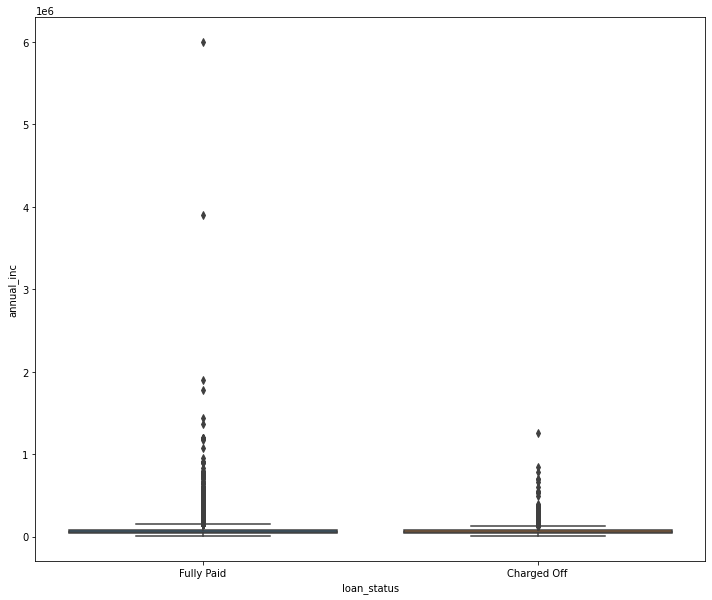

In [1413]:
# Boxplot to visualise distribution of annual reported income in each loan status

sns.boxplot(data=df, 
            x='loan_status', 
            y='annual_inc')
plt.show()

There are too many outliers in the data as customers might have exagerated their annual income to a greater extent. Let's check how many such rows are present and drop them.

In [1414]:
# Calculate the number of rows to drop based on outlier data

annual_inc_outlier_rows = df[df['annual_inc'] >= 200000].shape[0]
print ('Number of rows to drop : ', annual_inc_outlier_rows)

# Percentage of rows to be dropped rounded to 2 decimal places

perc_rows = annual_inc_outlier_rows/df.shape[0] * 100
print ('Percentage of outlier data = ' ,round(perc_rows,2))

Number of rows to drop :  667
Percentage of outlier data =  1.76


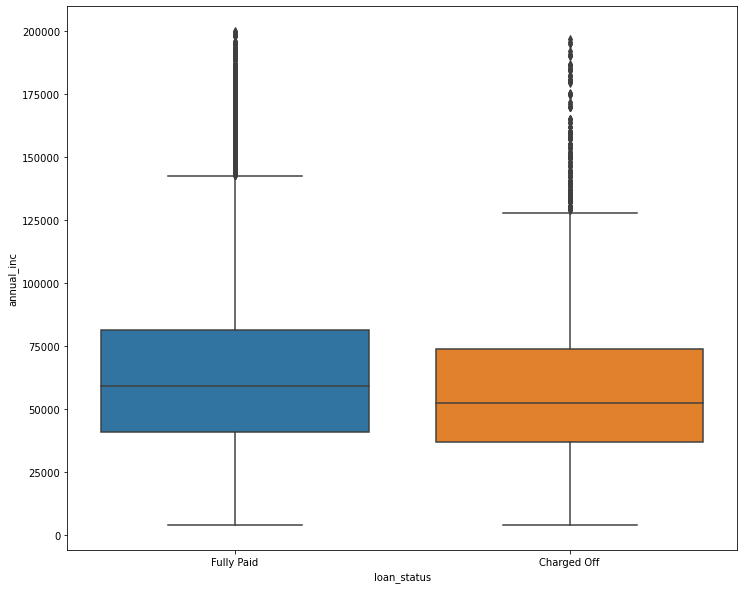

In [1415]:
# Dropping the outlier data and assigning dataframe back to same variable
df = df[ df['annual_inc'] < 200000 ]

# Visualising the boxplot for the same post data removal
sns.boxplot(data=df, 
            x='loan_status', 
            y='annual_inc')
plt.show()

### loan_amnt

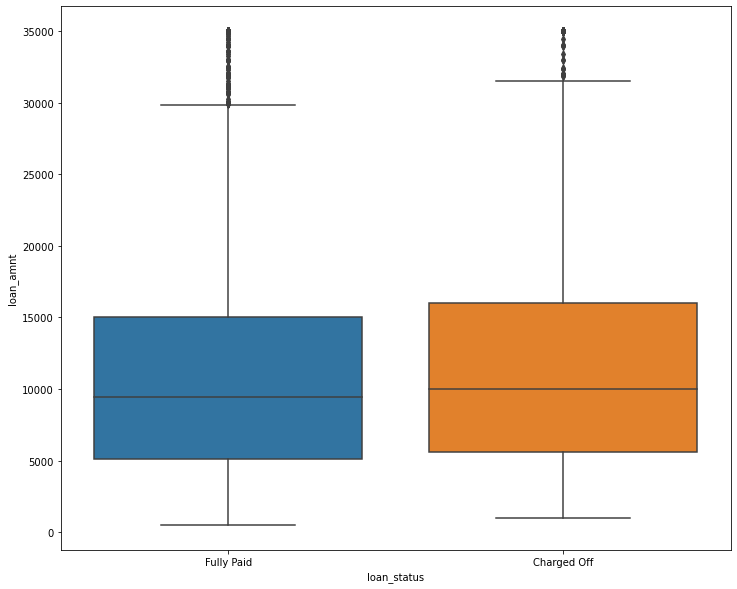

In [1416]:
# Boxplot to visualise distribution of loan amount in each loan status

sns.boxplot(data=df, 
            x='loan_status', 
            y='loan_amnt')
plt.show()

## Correlating variables

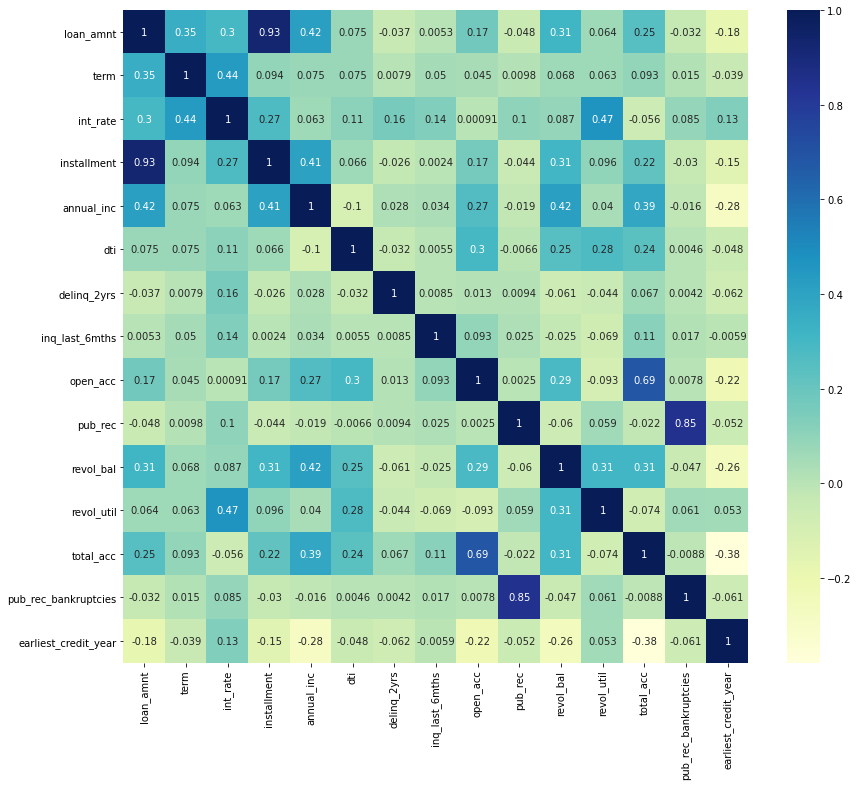

In [1417]:
# Setting figure size
plt.figure(figsize=(14,12))

# Assigning correlation matrix from the data frame
corr_mat = df.corr()

# Plotting a heatmap
sns.heatmap(data=df.corr(), cmap='YlGnBu', annot=True)

plt.show()

# Analysing Target variables
To identify the driving factors that leads to financial loss to the lending company, we will have to figure out the target variables that is causing the loan applicants to default on their loans. We will analyse different combinations of the variables to find any patterns in the data.

To analyse the statistics and find any patterns, we will categorise the target variable based on the following two factors:
- Customers personal details like occupation, employment, etc.
- Loan details like loan amount, debt to income ratio, etc

On the basis of these factors, let us categorise each columns in the data frame and analyse them separately. We will be using the columns **loan_status**, **grade**, **sub_grade** to analyse the type of data in each of these attributes and correlate them

## Customer's Personal details columns (Customer attributes)
- annual_income
- home_ownership
- grade
- sub_grade
- addr_state
- dti
- inq_last_6mths

## Loan and credit details columns (Loan attributes)
- installment
- int_rate
- loan_amnt
- pub_rec
- pub_rec_bankruptcies
- revol_bal
- revol_util
- open_acc
- total_acc

## Loan applicants in each loan status
We will try to find out the number of loan applications who are fully paid, charged off or current and see the percentage of loan applicants in each category.

In [1418]:
# Getting the count of loan applicants in each loan statuses

df_loan_status_counts = df['loan_status'].value_counts()
print (df_loan_status_counts)

Fully Paid     31738
Charged Off     5425
Name: loan_status, dtype: int64


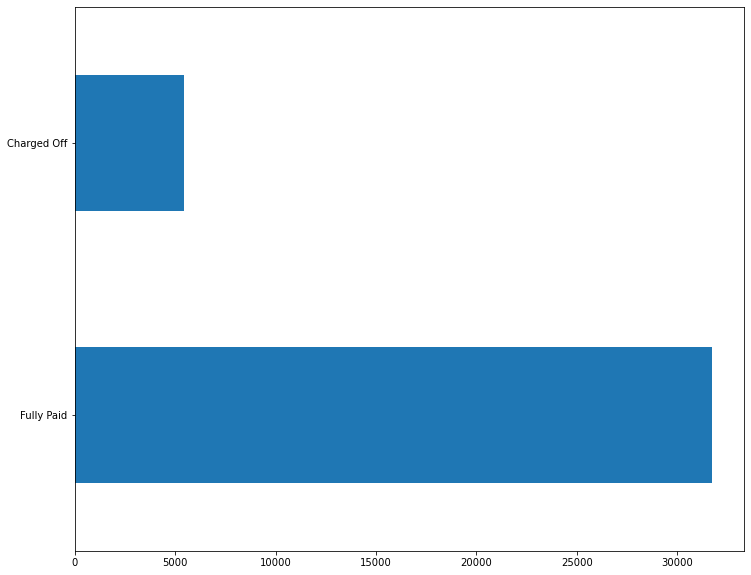

In [1419]:
# Visualising a bar plot for the above counts

df_loan_status_counts.plot.barh()
plt.show()

## loan_status against grades
We will check the count of loan applicants against each LC grade in different loan statuses

In [1420]:
df_by_grades = pd.pivot_table(data=df, 
                              columns=df['loan_status'], 
                              index=df['grade'], 
                              values='grade', 
                              fill_value=0, 
                              aggfunc='count')
df_by_grades

loan_status  Charged Off  Fully Paid
grade                               
A                    594        9194
B                   1380        9894
C                   1300        6204
D                   1070        3789
E                    685        1854
F                    301         617
G                     95         186

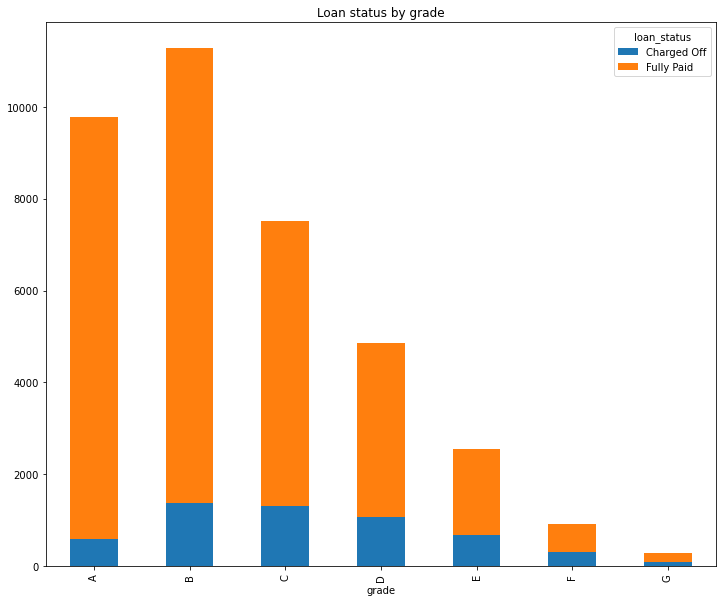

In [1421]:
# Ploting bar chart for the above counts

df_by_grades.plot(kind='bar', 
                  stacked=True, 
                  title='Loan status by grade')
plt.show()

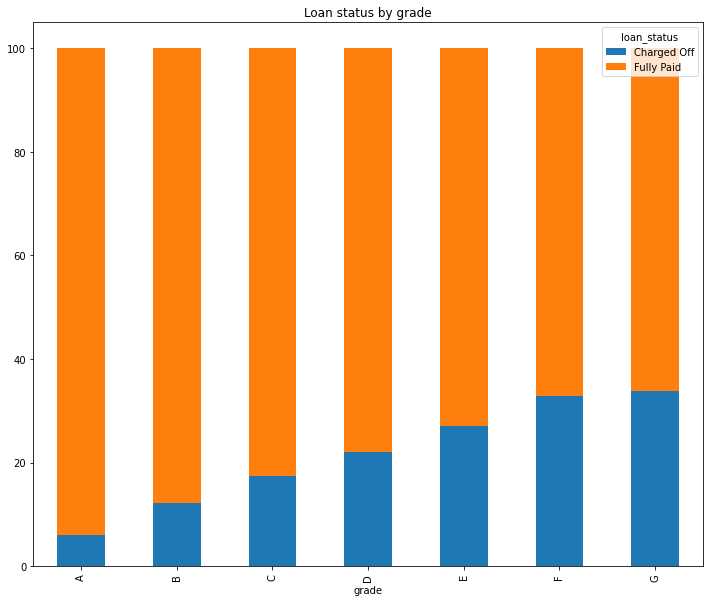

In [1422]:
# Calculating the percentage of counts

df_by_grades_absolute = df_by_grades[['Charged Off', 'Fully Paid']].apply(lambda x: 100 * x/x.sum(), axis=1)

df_by_grades_absolute.plot(kind='bar', 
                           stacked=True, 
                           title='Loan status by grade')
plt.show()

From the above plots, we can infer that charged off loan applicants are more towards the lower grades(towards G) and less towards the higher grades(towards A).

## loan_status against sub_grades

Let's analyse the number of loan applicants in each sub_grades assigned by LC

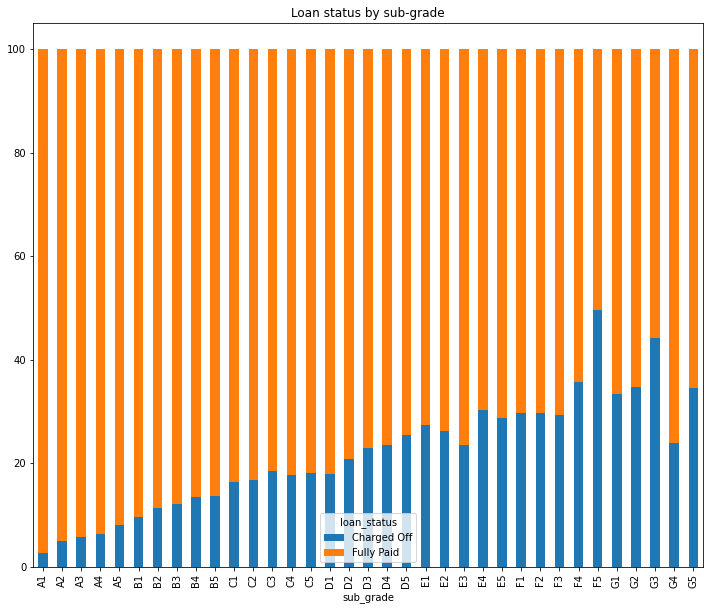

In [1423]:
# Create a pivot table to obtain count of loan applications against each subgrade
df_by_sub_grade = pd.pivot_table(data=df, 
                                 columns=df['loan_status'], 
                                 index=df['sub_grade'], 
                                 values='sub_grade', 
                                 fill_value=0, 
                                 aggfunc='count')

# Obtain the proportionate value counts in each subgrades for comparative analysis
df_by_sub_grade_absolute = df_by_sub_grade[['Charged Off', 'Fully Paid']].apply(lambda x: 100 * x/x.sum(), axis=1)

# Plot a stacked bar chart to analyse the trend
df_by_sub_grade_absolute.plot(kind='bar', stacked=True, title='Loan status by sub-grade')

plt.show()


We can see an increasing trend of number of loan applicants towards the lower subgrades. Reason being that the applicants assigned with lower subgrades have a poor credit history and that's why they usually default on their loans.

## int_rate and grade

Borrowers who are assigned LC grade 'A' will incur low interest rates on the loans while those assigned with 'G' will incur higher interest rates due to their poor credit history. Let's visualse it.

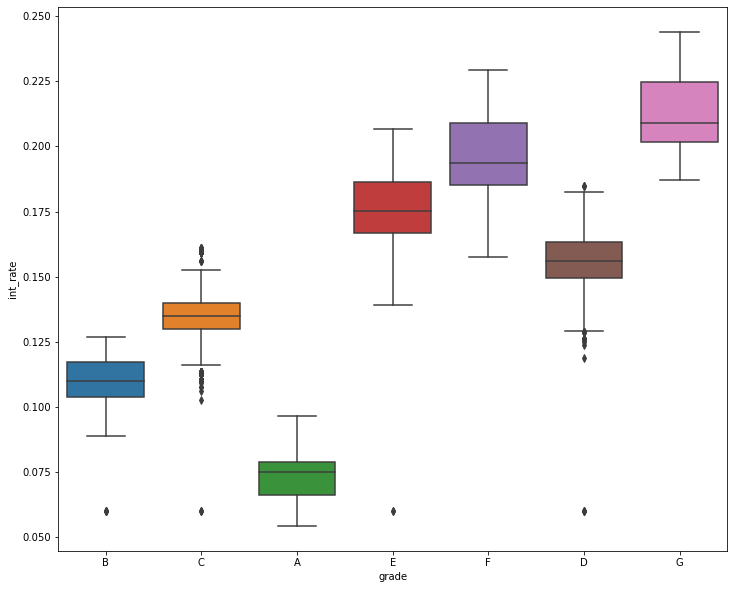

In [1424]:
# Visualing interest rates against grade using boxplot

sns.boxplot(data=df, 
            x='grade', 
            y='int_rate')
plt.show()

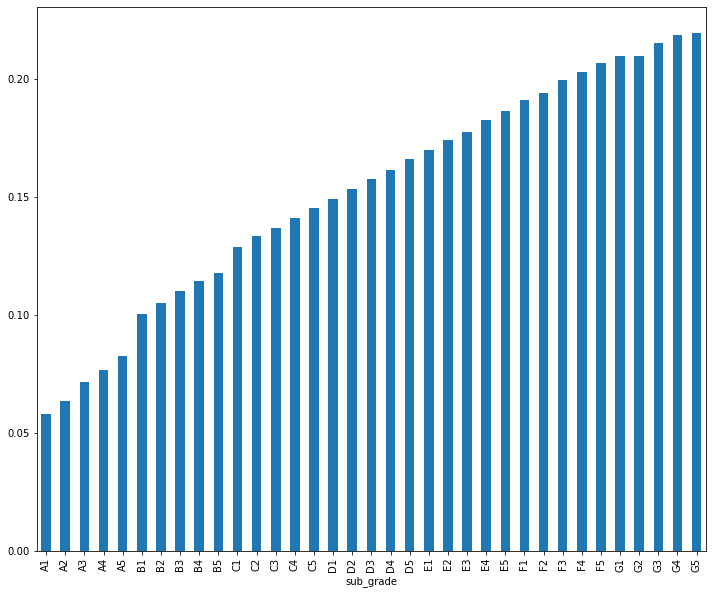

In [1425]:
# Grouping the dataset by subgrades and analysing interest rates

df_int_rate_sub_grade = df.groupby(['sub_grade'])['int_rate'].mean()
df_int_rate_sub_grade.plot.bar()
plt.show()

We can clearly see that lower subgrades(G) have high interest rates than higher subgrades (A)

## loan_amnt and installment

We can see from the heatmap above that loan_amnt and installment have very good correlation. This indicates that people applying for loan generally tend to pay high installments for higher loan amounts which is a fact.

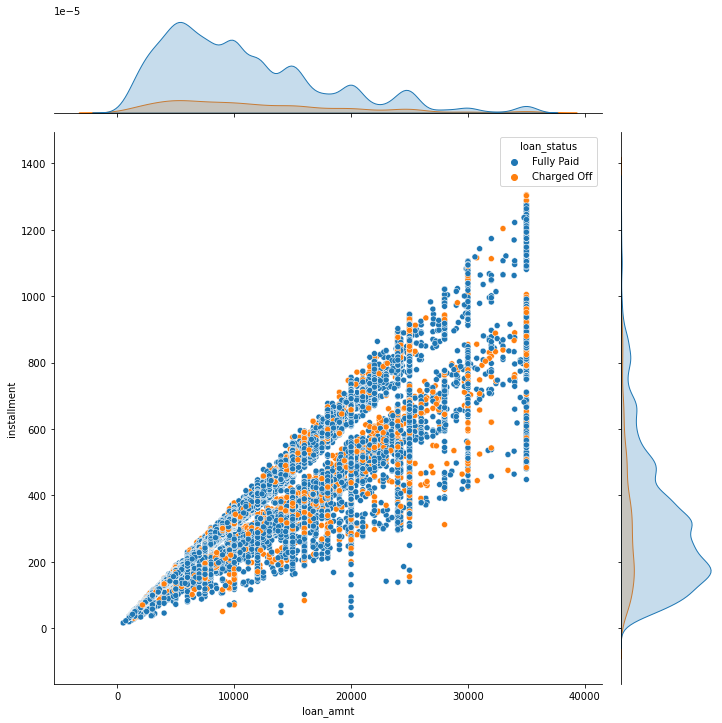

In [1426]:
# Using scatter plot to visualise loan amount and installment

sns.jointplot(data=df, 
              x='loan_amnt', 
              y='installment', 
              hue='loan_status', 
              height=10)
plt.show()

Analysis of statistical variables for installment and loan_amnt against loan_status

### installment and loan_status

In [1427]:
# Statistical data for loan amount categorised into different loan status

df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   5425.0  12009.211982  8031.558777  1000.0  5600.0  10000.0   
Fully Paid   31738.0  10744.630254  7077.458466   500.0  5100.0   9425.0   

                 75%      max  
loan_status                    
Charged Off  16000.0  35000.0  
Fully Paid   15000.0  35000.0

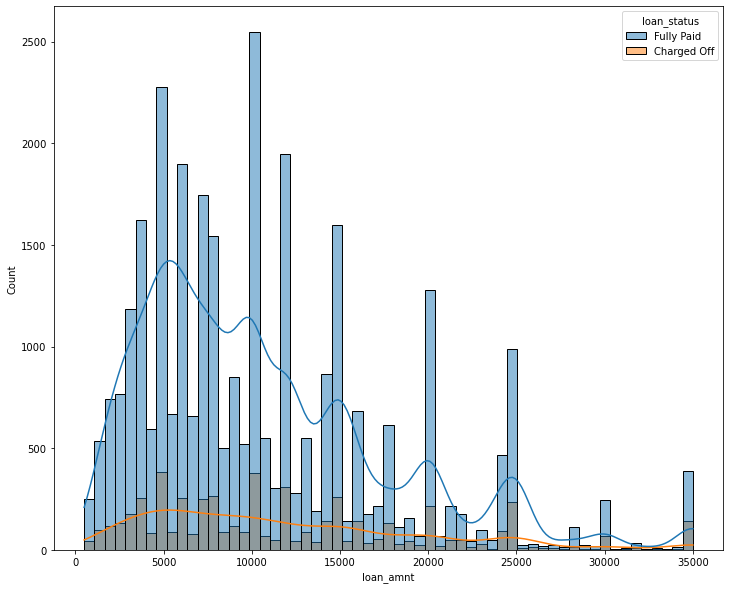

In [1428]:
# Visualize the count of loan amounts in each bucket

sns.histplot(data=df, 
             x='loan_amnt', 
             hue='loan_status', 
             kde=True)
plt.show()

In [1429]:
# Statistical data for installment categorised into different loan status

df.groupby('loan_status')['installment'].describe()

count        mean         std    min     25%      50%     75%  \
loan_status                                                                    
Charged Off   5425.0  332.033051  213.432217  22.79  168.45  289.760  448.60   
Fully Paid   31738.0  315.983791  202.651700  16.08  164.56  272.935  413.58   

                 max  
loan_status           
Charged Off  1305.19  
Fully Paid   1288.10

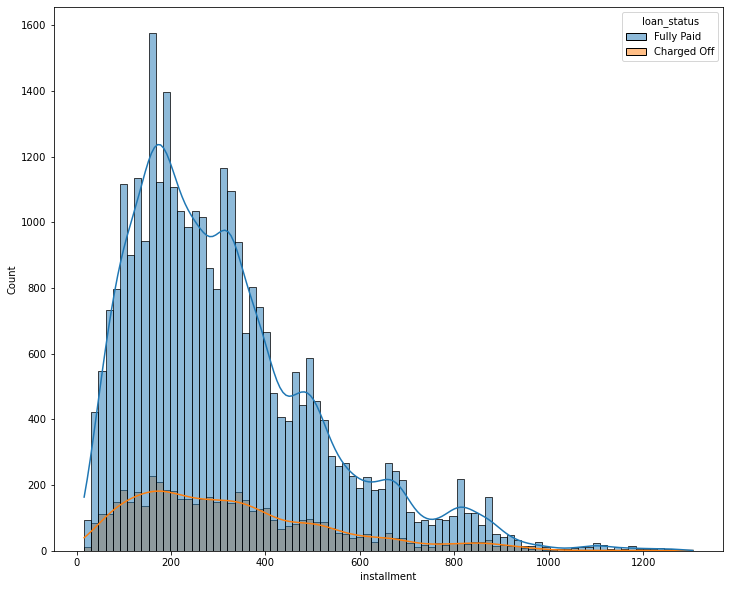

In [1430]:
# Visualize the count of installments in each bucket

sns.histplot(data=df, 
             x='installment', 
             hue='loan_status', 
             kde=True)
plt.show()

### term and loan_status

Let's try to find out in which loan tenure the borrowers get defaulted on their loan most often.

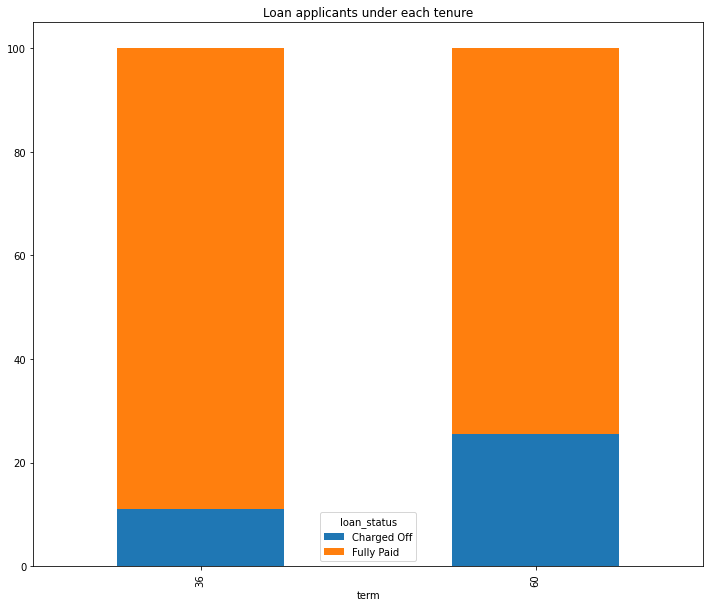

In [1431]:
# Count of loan applicants under each loan statuses for both 3 and years of loan tenure
df_term_loan_status = pd.pivot_table(data=df, 
                                     index=df['term'], 
                                     columns=df['loan_status'], 
                                     values='term', 
                                     aggfunc='count')

# Obtaining the proportion of the above count values
df_term_loan_status_absolute = df_term_loan_status.apply(lambda x: x/x.sum() * 100, axis=1)

# Visualizing the same using bar plot
df_term_loan_status_absolute.plot(kind='bar', stacked=True, title='Loan applicants under each tenure')

plt.show()

Borrowers default on their loans with tenure as 5 years more often than in 3 years tenure.

## term and interest_rate

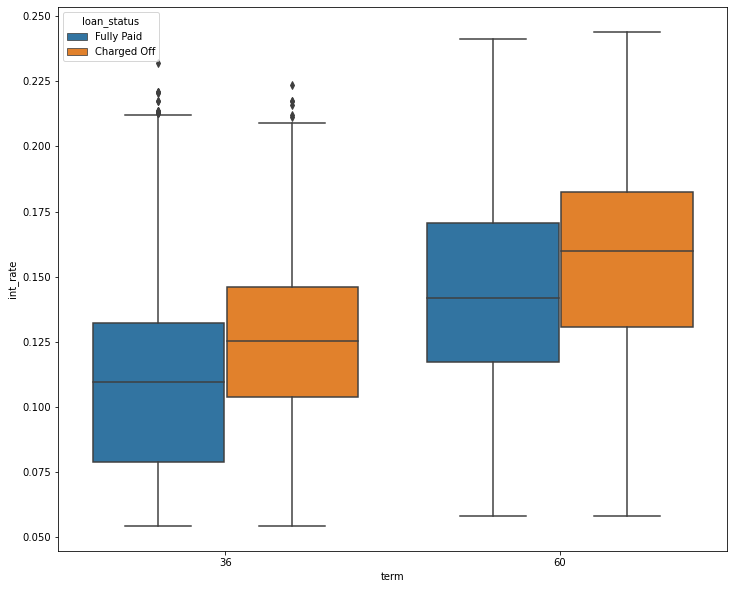

In [1432]:
# Visualise interest rates for different loan term

sns.boxplot(data=df, 
            x='term', 
            y='int_rate', 
            hue='loan_status')
plt.show()

**Observation:** 5 years loan tenure are offered high interest rates than 3 years. That's why we see more borrowers default on their loans in 5 years loan term

### annual_inc and int_rate

Bivariate analysis of annual_inc and int_rate

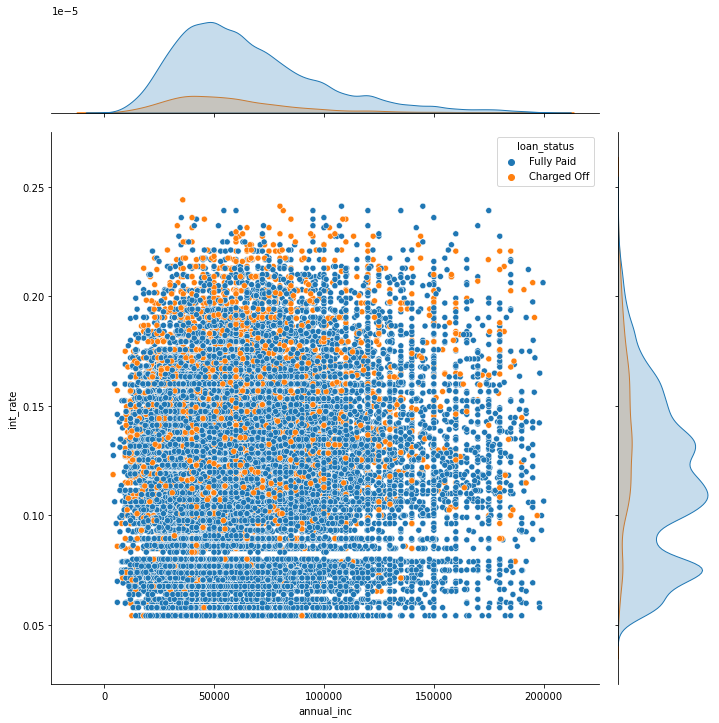

In [1433]:
# Scatterplot for annual income and interest rates

sns.jointplot(data=df, 
              x='annual_inc', 
              y='int_rate', 
              hue='loan_status', 
              height=10)
plt.show()

**Observations:**
1. Data density is more towards low income applicants
2. People with low annual income and high interest rates seems to default on their loans more often. These are the borrowers who are assigned lower grades (towards G)
3. People with low interest rates usually pay of their loans. They are assigned higher grades (towards A)

### dti

Let's analyse the distribution of *dti* variable and do a bivariate analysis with other variables

In [1434]:
# Statistical analysis of dti

df.groupby('loan_status')['dti'].describe()

count       mean       std  min   25%    50%    75%    max
loan_status                                                              
Charged Off   5425.0  14.102723  6.561652  0.0  9.20  14.40  19.37  29.85
Fully Paid   31738.0  13.287609  6.657033  0.0  8.15  13.36  18.54  29.99

Since mean and median are almost same, we should be seeing a probability density curve normalized at the center

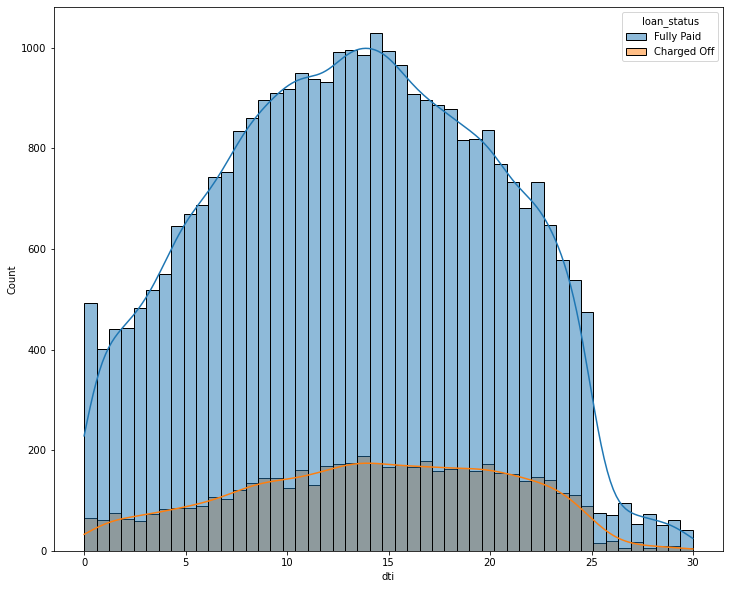

In [1435]:
# Visualise dti by loan status

sns.histplot(data=df, 
             x='dti', 
             hue='loan_status', 
             kde=True)

plt.show()

### annual_inc and dti

From the correlation matrix, we see a negative correlation between borrower's annual_inc and their dti though less. The dti is high for customers with low annual income. We can see that from the scatter plot below. 

In [1436]:
# Plotly lib to visualise the density of dti of borrowers against their annual_inc
fig = px.scatter(df, 
                 x='annual_inc', 
                 y='dti', 
                 color='dti', 
                 trendline="ols")

fig.show()

Next, we will see the distribution of borrower's who defaulted on their loans and compare their dti against annual_inc

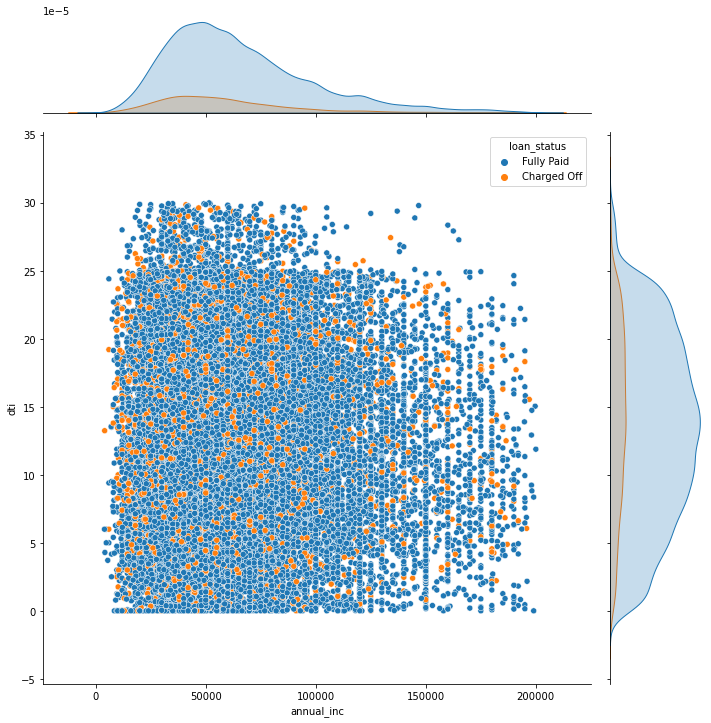

In [1437]:
# Visualise the bivariate analysis of dti and annual_inc for each loan_statuses
sns.jointplot(data=df, 
              x='annual_inc', 
              y='dti', 
              hue='loan_status', 
              height=10)

plt.show()

### open_acc and loan_status

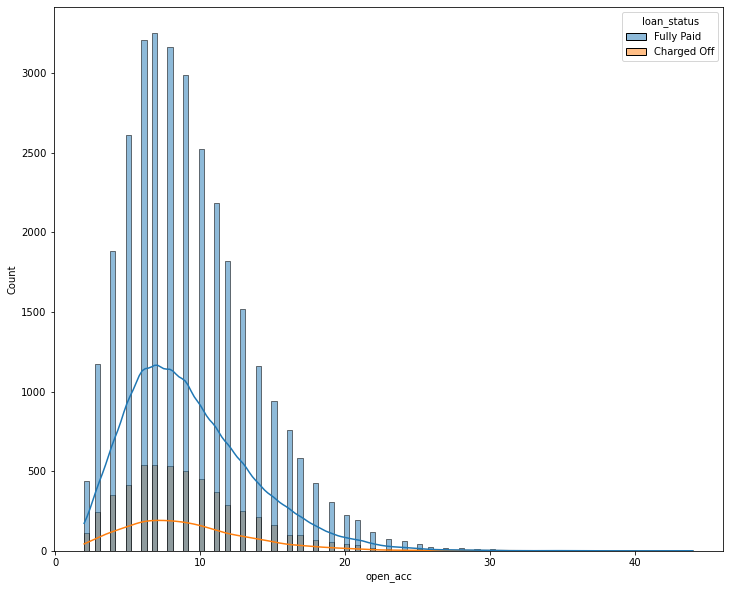

In [1438]:
# Visualising the number of open credit lines by loan status

sns.histplot(data=df, 
             x='open_acc', 
             hue='loan_status', 
             kde=True)
plt.show()

### total_acc and loan_status

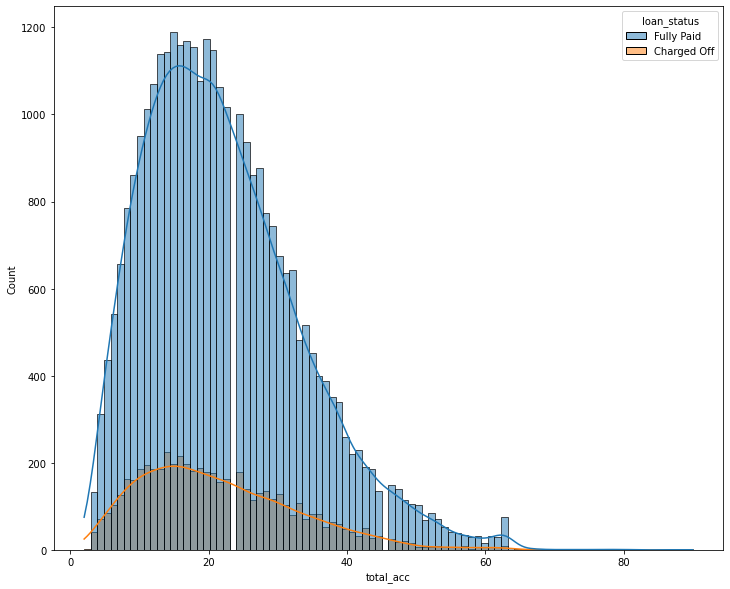

In [1439]:
# Visualising the total number of credit lines by loan status

sns.histplot(data=df, 
             x='total_acc', 
             hue='loan_status', 
             kde=True)
plt.show()

### revol_bal

**Univariate analysis**

In [1440]:
df.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   5425.0  13308.926083  14802.903833  0.0  3995.0  9175.0   
Fully Paid   31738.0  12852.811677  15062.845879  0.0  3599.0  8607.5   

                  75%       max  
loan_status                      
Charged Off  17256.00  147365.0  
Fully Paid   16512.75  149527.0

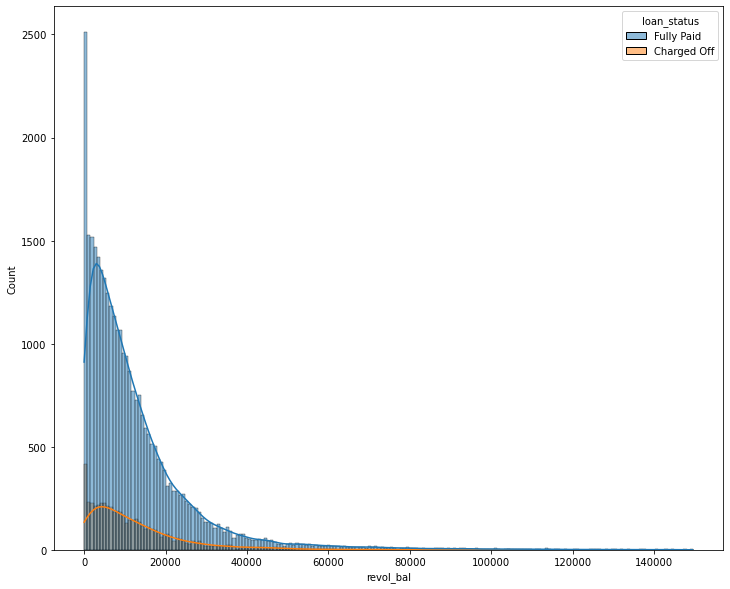

In [1441]:
# Plotting the counts of number of borrowers with different range of revolving credit balance

sns.histplot(data=df, 
             x='revol_bal', 
             hue='loan_status', 
             kde=True)
plt.show()

**Observations:** We have very less number of loan applicants with high revolving balance. There are approx 2500 borrowers who do not have any revolving balance yet. 

**Bivariate analysis**

### revol_bal and annual_inc

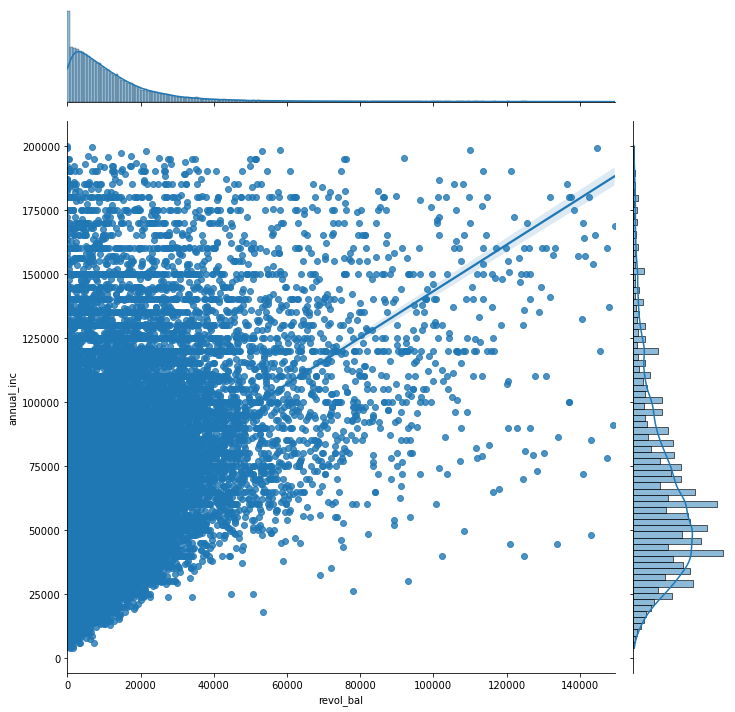

In [1442]:
# Visualise borrower's annual income against their revolving credit balance
sns.jointplot(data=df, 
              x='revol_bal', 
              y='annual_inc', 
              height=10, 
              kind='reg')

plt.show()

**Observation:** It is expected that borrower's who have low annual income will have less revolving balance as they tend to spend less on their expenditures. If their annual income is more, their lifestyle will be high class and they tend to spend more.

### revol_util and loan_status

In [1443]:
df.groupby('loan_status')['revol_util'].describe()

count      mean       std  min    25%    50%    75%    max
loan_status                                                              
Charged Off   5425.0  0.556436  0.278627  0.0  0.344  0.585  0.791  0.999
Fully Paid   31738.0  0.476284  0.282086  0.0  0.241  0.477  0.708  0.999

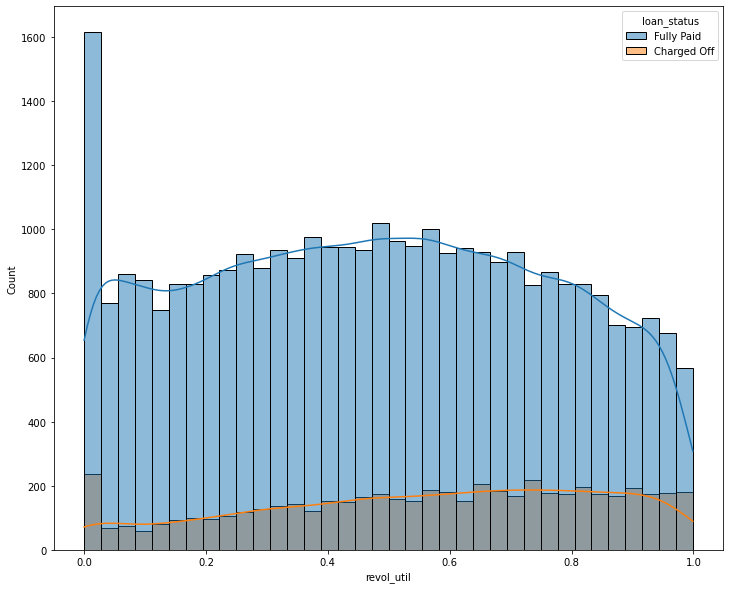

In [1444]:
# Visualising Credit utilisation rate 
sns.histplot(data=df, 
             x='revol_util', 
             hue='loan_status', 
             kde=True)
plt.show()

### revol_util and int_rate

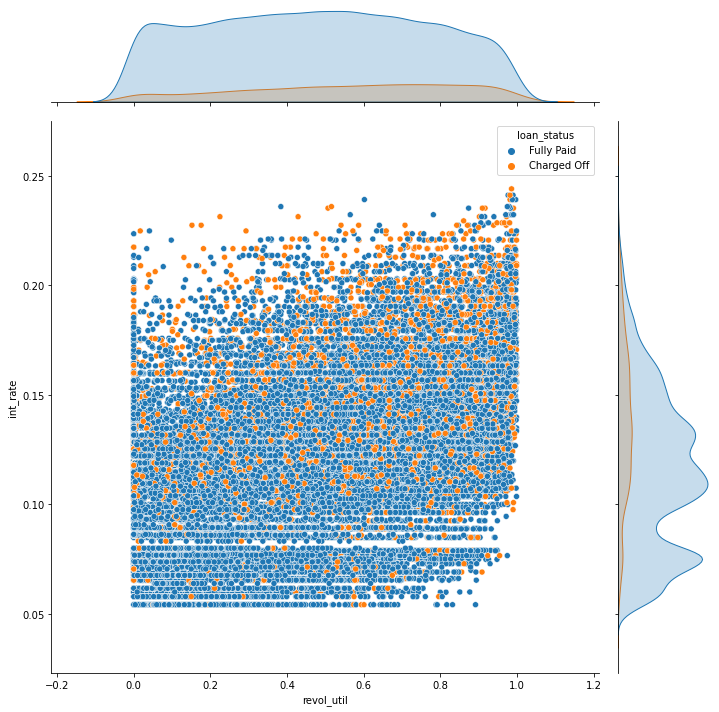

In [1445]:
# Visualise revolving balance utilsation rate against interest rate
sns.jointplot(data=df, 
              x='revol_util', 
              y='int_rate', 
              height=10, 
              hue='loan_status')
plt.show()

**Observation:** Borrowers with hight credit utilisation rate tend to default on their loans. 

*If you have high revolving credit limits and low balances, creditors take that as a sign that you know how to use credit wisely. If you are borrowing heavily against all your credit cards and revolving lines of credit, that can be a sign you’re not as financially responsible as you could be—or are under financial strain.* 
Source: [LendingClub](https://www.lendingclub.com/loans/resource-center/what-is-credit-utilization) 


### home_ownership

**Univariate analysis**

In [1446]:
# Counting applicants from different categories of home ownership

df['home_ownership'].value_counts()

RENT        17927
MORTGAGE    16279
OWN          2863
OTHER          94
Name: home_ownership, dtype: int64

**Bivariate analysis**

### home_ownership and loan_status

In [1447]:
# Obtaining the counts of loan applicants in each loan statuses under different home ownership categories

df_ho_loan_status = pd.pivot_table(data=df, 
                                   index=df['home_ownership'], 
                                   columns=df['loan_status'], 
                                   values='home_ownership', 
                                   aggfunc='count')

df_ho_loan_status


loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2238       14041
OTHER                    18          76
OWN                     424        2439
RENT                   2745       15182

In [1448]:
# Obtaining the percentage of counts of all the above loan applicants 
df_ho_loan_status_absolute = df_ho_loan_status.apply(lambda x: x/df.shape[0] * 100, axis=1)

df_ho_loan_status_absolute

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE           6.022119   37.782203
OTHER              0.048435    0.204504
OWN                1.140920    6.562979
RENT               7.386379   40.852461

Borrowers who stay on RENT and MORTGAGE are more likely to default on their loans than the ones who own a house.

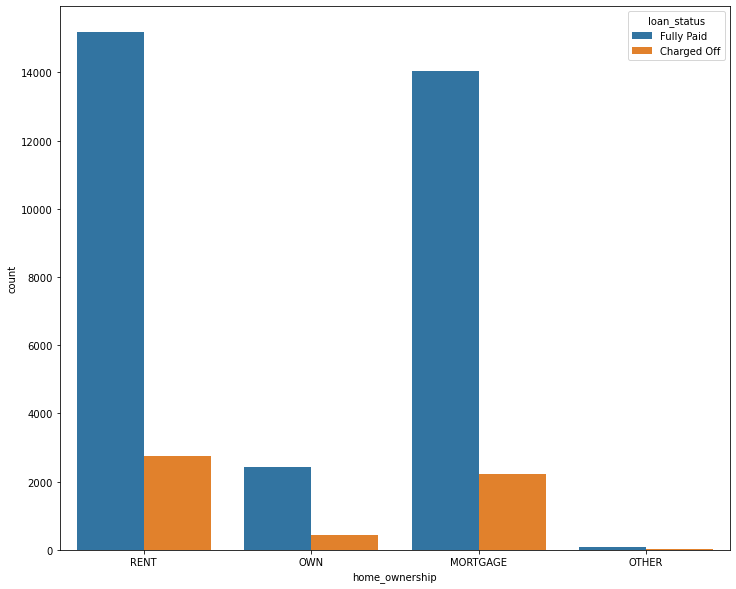

In [1449]:
# Visualising the counts against loan_status using countplot

sns.countplot(data=df, 
              x='home_ownership', 
              hue='loan_status')
plt.show()

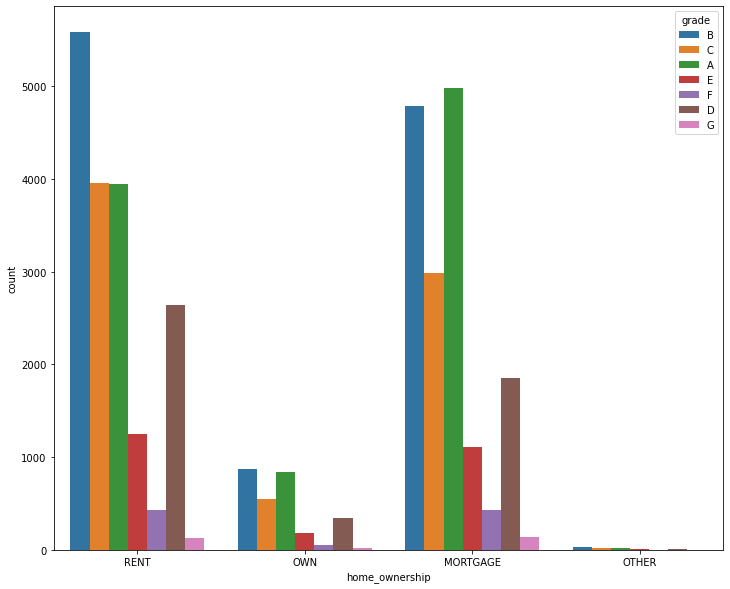

In [1450]:
# Visualising the counts against grade using countplot

sns.countplot(data=df, 
              x='home_ownership', 
              hue='grade')
plt.show()

### purpose

**Univariate analysis**

In [1451]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.471087
credit_card           0.130479
other                 0.099104
home_improvement      0.072707
major_purchase        0.056158
small_business        0.044453
car                   0.039421
wedding               0.023975
medical               0.017598
moving                0.014961
vacation              0.009902
house                 0.009418
educational           0.008073
renewable_energy      0.002664
Name: purpose, dtype: float64

Maximum loan applications under *debt_consolidation* category

**Bivariate analysis**

### purpose and loan_status

In [1452]:
# Obtaining the counts of loan applicants in each loan statuses under different purpose values
df_purpose_loan_status = pd.pivot_table(data=df, 
                                        index=df['purpose'], 
                                        columns=df['loan_status'], 
                                        values='purpose', 
                                        aggfunc='count')

df_purpose_loan_status

loan_status         Charged Off  Fully Paid
purpose                                    
car                         156        1309
credit_card                 526        4323
debt_consolidation         2689       14818
educational                  51         249
home_improvement            326        2376
house                        57         293
major_purchase              215        1872
medical                     104         550
moving                       87         469
other                       599        3084
renewable_energy             18          81
small_business              453        1199
vacation                     53         315
wedding                      91         800

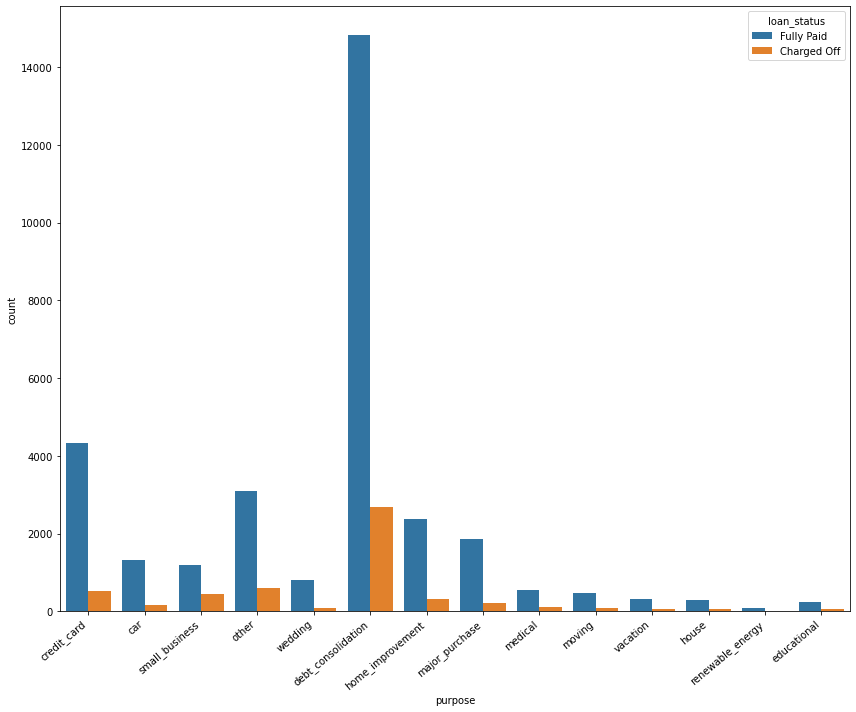

In [1453]:
# Visualising the counts against loan_status using countplot

fig = sns.countplot(data=df, 
              x='purpose', 
              hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=40, 
                    ha="right")
plt.tight_layout()

plt.show()

### home_ownership and purpose

Let's analyse the loan applications for people who stay on RENT and MORTGAGE and see in which category did they apply the loan and got defaulted.

In [1454]:
# Deriving the counts of loan applicants applying for loans under different purposes 
# and analysing it against home_ownership.

df_home_own_purpose = pd.pivot_table(data=df[ df['loan_status'] == 'Charged Off'],
                                     index=df['home_ownership'], 
                                     columns=df['purpose'], 
                                     values='home_ownership', 
                                     fill_value=0, 
                                     aggfunc='count')
df_home_own_purpose


purpose         car  credit_card  debt_consolidation  educational  \
home_ownership                                                      
MORTGAGE         68          221                1118           11   
OTHER             1            2                   7            0   
OWN              14           37                 189            5   
RENT             73          266                1375           35   

purpose         home_improvement  house  major_purchase  medical  moving  \
home_ownership                                                             
MORTGAGE                     250     18              75       42       7   
OTHER                          1      0               0        0       1   
OWN                           40      3              23        9       6   
RENT                          35     36             117       53      73   

purpose         other  renewable_energy  small_business  vacation  wedding  
home_ownership                                                              
MORTGAGE          172                 9             203        13       31  
OTHER               2                 0               4         0        0  
OWN                57                 1              33         4        3  
RENT              368                 8             213        36       57

**Observations:**
1. People staying on RENT and MORTGAGE - Most of them defaulting in *credit_card* payoff, *debt_consolidation* and *small_business*.
1. People staying in MORTGAGE - We can see 248 borrowers defaulting in loan under *home_improvement* category
2. People staying on RENT - 361 borrowers defaulting on loan in *other* category

In [1455]:
# Store details of people staying on rent
df_rent = df[ df['home_ownership'] == 'RENT']

# Store details of people staying on mortgage
df_mortgage = df[ df['home_ownership'] == 'MORTGAGE']

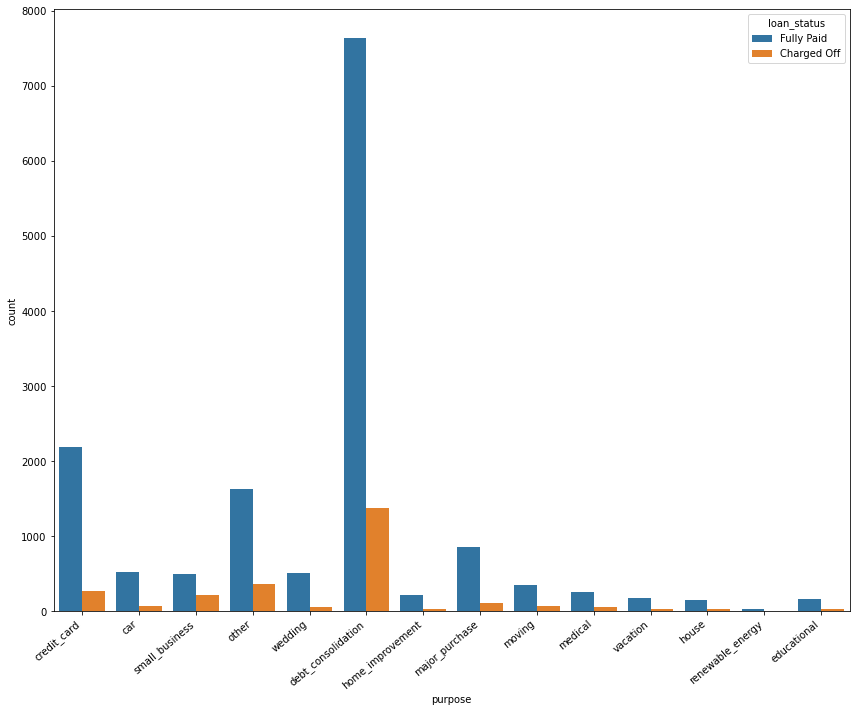

In [1456]:
# Couting rented borrowers under different category of purpose
fig = sns.countplot(data=df_rent, x='purpose', hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=40, 
                    ha="right")
plt.tight_layout()

plt.show()

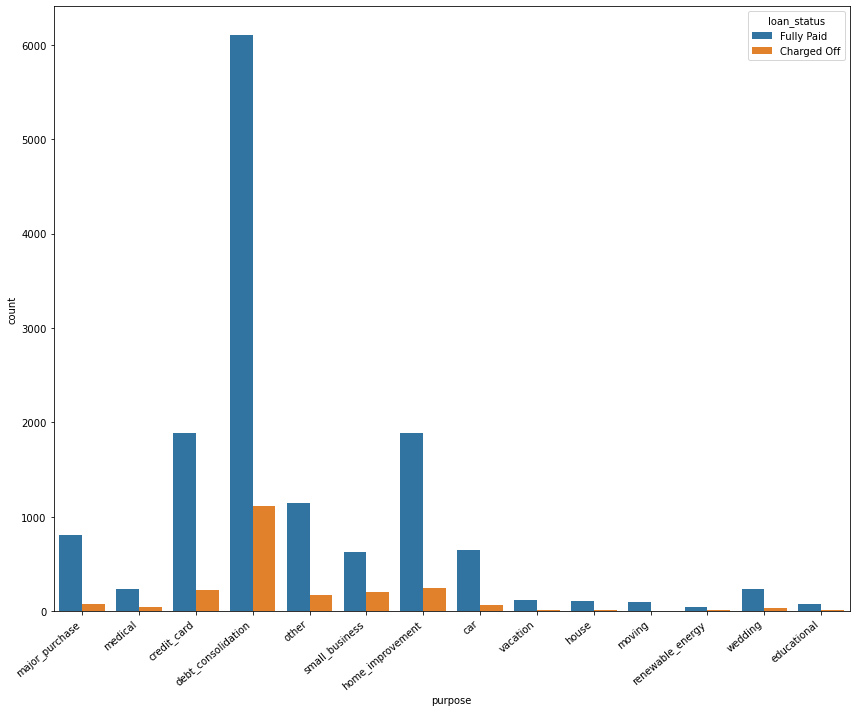

In [1457]:
# Couting mortgage borrowers under different category of purpose
fig = sns.countplot(data=df_mortgage, 
                    x='purpose', 
                    hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=40, 
                    ha="right")

plt.tight_layout()
plt.show()

### earliest_credit_year

In [1458]:
df['earliest_credit_year'].value_counts()

2000    3066
1999    2824
1998    2688
2001    2403
1997    2307
1996    2111
1995    1983
1994    1840
2002    1830
2003    1769
2004    1686
2005    1456
1993    1386
2006    1146
1992     975
1990     945
1991     876
1989     791
2007     695
1988     671
1987     551
1986     462
1985     409
1984     366
1983     304
1982     200
1981     170
1980     165
1978     155
2008     150
1979     148
1977     109
1976      86
1975      79
1974      60
1973      58
1970      47
1971      41
1972      41
1969      34
1968      19
1967      17
1966      11
1963       8
1965       7
1962       5
1964       5
1954       2
1961       2
1959       1
1946       1
1950       1
1956       1
Name: earliest_credit_year, dtype: int64

In [1459]:
# Finding the assigned grades count for borrower's falling under different earliest credit year
df_credit_year = pd.pivot_table(data=df, 
                                index=df['earliest_credit_year'], 
                                columns=df['grade'], 
                                values='earliest_credit_year', 
                                fill_value=0, 
                                aggfunc='count')

df_credit_year

grade                   A    B    C    D    E    F   G
earliest_credit_year                                  
1946                    0    1    0    0    0    0   0
1950                    0    1    0    0    0    0   0
1954                    1    0    0    1    0    0   0
1956                    0    1    0    0    0    0   0
1959                    1    0    0    0    0    0   0
1961                    0    2    0    0    0    0   0
1962                    1    1    1    1    1    0   0
1963                    4    3    1    0    0    0   0
1964                    3    1    0    1    0    0   0
1965                    3    0    2    2    0    0   0
1966                    4    2    2    1    2    0   0
1967                    5    8    3    1    0    0   0
1968                    9    3    4    1    1    1   0
1969                   13   14    5    1    1    0   0
1970                   21    9    8    6    2    1   0
1971                   15   10    6    7    3    0   0
1972                   16   12    9    2    1    0   1
1973                   13   21   12    5    7    0   0
1974                   35   13    3    5    4    0   0
1975                   31   26    9    4    6    3   0
1976                   37   24   12   10    1    2   0
1977                   36   37   14    8   13    1   0
1978                   60   43   25   19    7    0   1
1979                   55   45   24   18    6    0   0
1980                   62   50   23   17    9    3   1
1981                   68   44   29   14   12    0   3
1982                   68   66   36   14   12    4   0
1983                   87   95   67   32   20    3   0
1984                  127   93   78   39   19    5   5
1985                  128  146   64   43   21    6   1
1986                  177  122   81   42   27   11   2
1987                  183  178   93   51   29   13   4
1988                  219  192  121   78   41   14   6
1989                  255  260  140   72   42   15   7
1990                  291  308  141  122   54   25   4
1991                  307  245  153   92   55   20   4
1992                  315  294  162  116   56   24   8
1993                  418  433  260  151   83   28  13
1994                  538  547  359  204  125   54  13
1995                  525  590  410  254  137   50  17
1996                  596  626  407  248  157   57  20
1997                  651  637  455  311  182   58  13
1998                  716  839  568  301  194   55  15
1999                  734  889  556  387  180   61  17
2000                  762  922  649  394  210  102  27
2001                  601  758  487  330  164   45  18
2002                  430  559  413  247  114   52  15
2003                  422  580  378  250   97   28  14
2004                  354  550  365  239  114   46  18
2005                  221  475  349  234  125   40  12
2006                  141  314  297  245   98   38  13
2007                   28  150  181  192   94   42   8
2008                    1   35   42   47   13   11   1

**Observation**: This data can be used to predict the **grades** and **sub_grades** based on the earliest credit year of the borrower and whther that borrower has defaulted on the loan or not

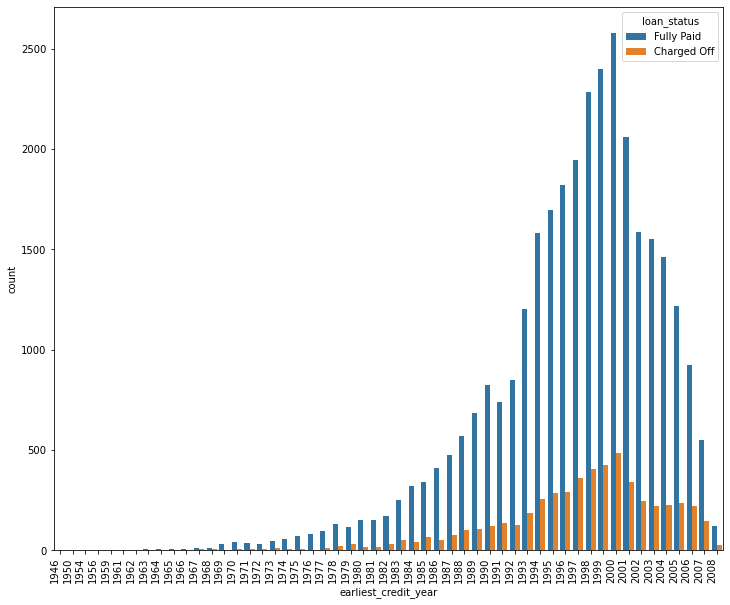

In [1460]:
# Couting number of loan applicants based on earliest credit years with categorical variable as loan_status
fig=sns.countplot(data=df, 
                  x='earliest_credit_year',
                  hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=90, 
                    ha="right")

plt.show()

**Observations:**
We can see less number of borrowers towards the beginning and the end of the earliest credit years. Reason being those borrowers with credit years starting 1946 will be a senior citizen by now and they will have been fully settled in their homes. For those borrowers whose earliest credit history is in 21st century, they are just starting to settle down. They might be the youngsters, teenagers or adults who just started with their credit balance.

Borrowers with earliest credit year in the range 1994 - 2002 has more number of loan applications and they are the ones who defaulted on their loans.

Let's take a chunk of data with earliest credit history containing maximum borrowers. We will analyse the data for years between **1995** and **2002**

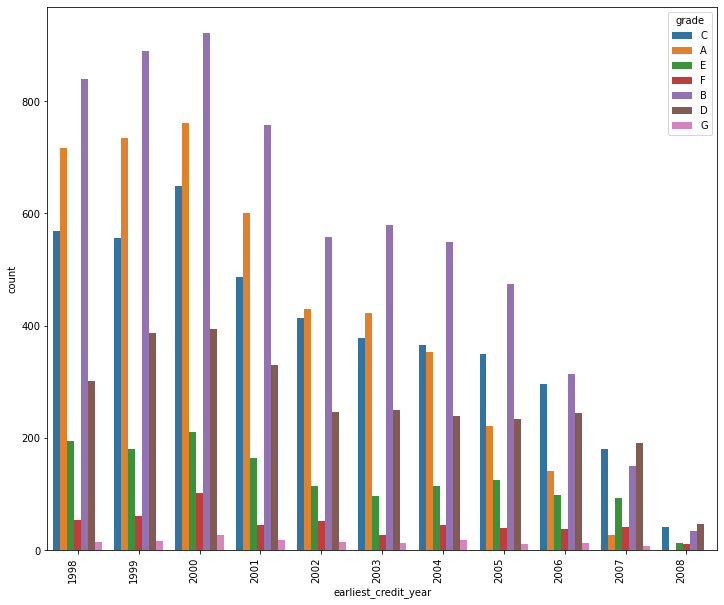

In [1461]:
df_1995_2002 = df[ df['earliest_credit_year'].between(1998,2009) ]

fig=sns.countplot(data=df_1995_2002, 
                  x='earliest_credit_year',
                  hue='grade')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=90, 
                    ha="right")

plt.show()

**Observation:** Taking a chunk of data where we see huge number of borrowers with the earliest credit years between 1998 and 2008, we can see that most of them are assigned grades **B**.  

Next, we will find the percentage of borrowers who were assigned the top 3 grades above (B, A, C) and defaulted on their loans

In [1462]:
df_cr_yr_grades = df_1995_2002[ df_1995_2002['grade'].isin(['A', 'B', 'C'])]
df_cr_yr_grades_counts = pd.pivot_table(data=df_cr_yr_grades, 
                                        index=df['grade'], 
                                        columns=df['loan_status'], 
                                        values='grade', 
                                        aggfunc='count')
df_cr_yr_grades_counts_perc = df_cr_yr_grades_counts.apply(lambda x: x/x.sum() * 100, axis=1)
df_cr_yr_grades_counts_perc

loan_status  Charged Off  Fully Paid
grade                               
A               6.417234   93.582766
B              11.925548   88.074452
C              16.732789   83.267211

**Observation:** Percentage of charged off borrowers is more for those assigned grade **C**. Business can make smart decisions using these results

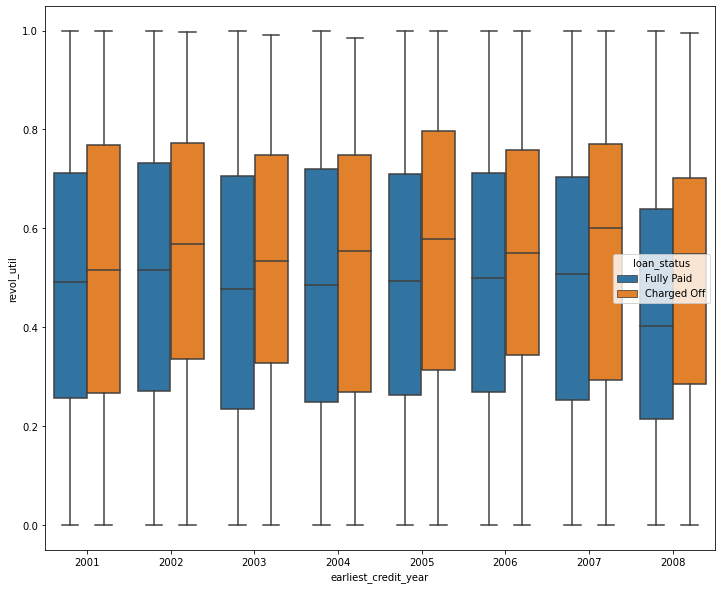

In [1497]:
# Visualise revolving utlisation rate for borrowers with recent earliest credit year

sns.boxplot(data=df[df['earliest_credit_year'] > 2000], 
            x='earliest_credit_year', 
            y='revol_util', 
            hue='loan_status')
plt.show()

**Observation:** Taking a chunk of data with earliest credit year > 2000 , we see that loan defaulters are having max revol_util rate as 0.8 which is very high. LC should reduce issuing loans to such applicants

### pub_rec_bankruptcies

In [1463]:
df['pub_rec_bankruptcies'].value_counts()

0.0    35534
1.0     1624
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [1464]:
# Count of loan applicants with different number of public record bankruptcies

pd.pivot_table(data=df, 
               index=df['loan_status'], 
               columns=df['pub_rec_bankruptcies'], 
               values='loan_status', 
               aggfunc='count')

pub_rec_bankruptcies    0.0   1.0  2.0
loan_status                           
Charged Off            5059   364    2
Fully Paid            30475  1260    3

### pub_rec

In [1465]:
df['pub_rec'].value_counts()

0    35134
1     1974
2       46
3        7
4        2
Name: pub_rec, dtype: int64

In [1466]:
# Count of loan applicants with different number of public derogatory records

pd.pivot_table(data=df, 
               index=df['loan_status'], 
               columns=df['pub_rec'], 
               values='loan_status', 
               fill_value=0,
               aggfunc='count')

pub_rec          0     1   2  3  4
loan_status                       
Charged Off   4969   446  10  0  0
Fully Paid   30165  1528  36  7  2

### pub_rec and int_rate

Since derogatory items are considered negative for lenders, customers who have huge number of public derogatories does not qualify for credit or other services.

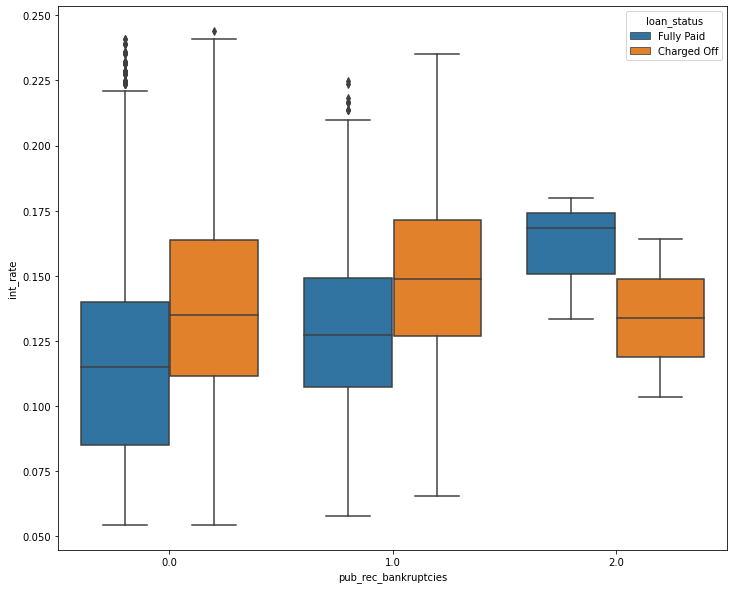

In [1467]:
# Plotting interest rates against categorical variable pub_rec

sns.boxplot(data=df, 
            x='pub_rec_bankruptcies', 
            y='int_rate',
            hue='loan_status')

plt.show()

Borrowers who have defaulted on their loan have higher interest rates than those who have fully paid. We can ignore the borrowers who have fall under 2 public_rec_bankruptcies since there are only 5 of them in that category.

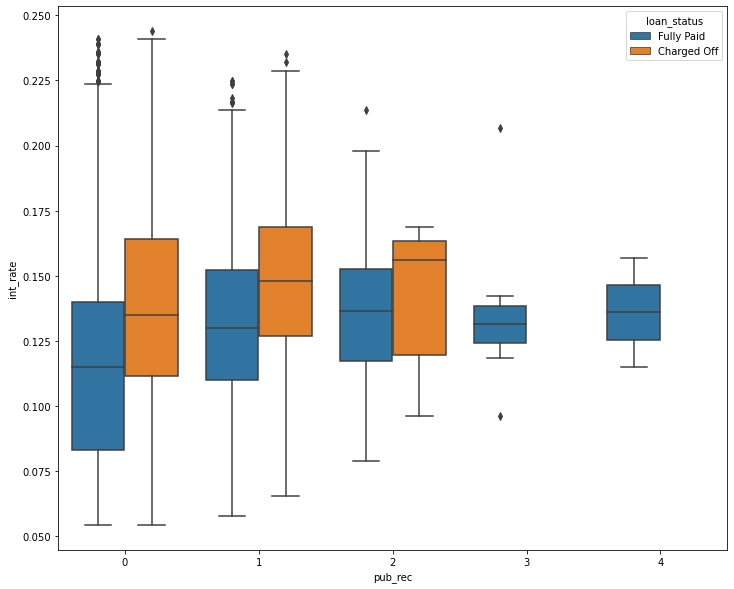

In [1468]:
# Plotting interest rates against categorical variable pub_rec

sns.boxplot(data=df, 
            x='pub_rec', 
            y='int_rate',
            hue='loan_status')

plt.show()

We can see a slight increase in the interest rates for each of the public derogatories count. From the correlation matrix, we see that the both the above attributes have positive correlation. Loan defaulted borrowers have higher interest rates than the ones who have fully paid.

### verification_status

In [1469]:
# Analyse the counts of borrowers with their income verification types

pd.pivot_table(data=df, 
               index=df['verification_status'], 
               columns=df['loan_status'], 
               values='verification_status', 
               fill_value=0, 
               aggfunc='count')

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                1999       13839
Source Verified             1412        8047
Verified                    2014        9852

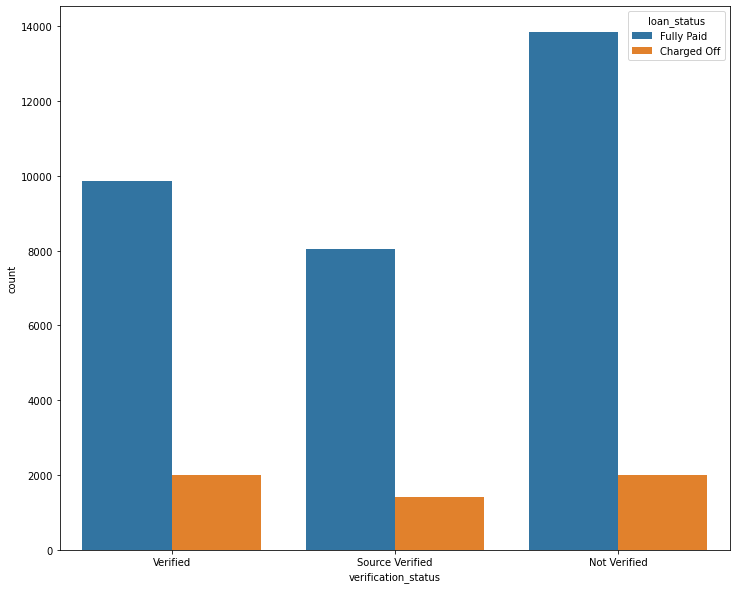

In [1470]:
# Visualising the counts using countplot

sns.countplot(data=df, 
              x='verification_status', 
              hue='loan_status')
plt.show()

### addr_state

In [1483]:
# Getting the borrowers resident state code 

df_addr_state = pd.pivot_table(data=df, 
                               index=df['addr_state'], 
                               columns=df['loan_status'], 
                               values='addr_state', 
                               fill_value=0, 
                               aggfunc='count')

# Sorting the rows in decreasing order of charged off borrowers
df_addr_state.sort_values(by=['Charged Off', 'Fully Paid'], 
                          ascending=False, 
                          inplace=True)

df_addr_state

loan_status  Charged Off  Fully Paid
addr_state                          
CA                  1086        5656
FL                   477        2209
NY                   473        3053
TX                   302        2255
NJ                   269        1434
GA                   208        1105
IL                   191        1242
PA                   175        1263
VA                   173        1141
MD                   153         821
MA                   152        1071
OH                   150         996
WA                   125         657
AZ                   119         699
MO                   112         543
NC                   107         601
NV                   106         363
MI                   100         588
CO                    93         637
CT                    92         597
MN                    78         512
OR                    70         357
SC                    65         375
WI                    61         357
AL                    53         372
LA                    53         356
KY                    45         264
OK                    39         244
UT                    37         204
KS                    31         218
NM                    30         143
HI                    28         136
AR                    26         199
NH                    25         135
RI                    24         163
WV                    21         151
DC                    14         190
AK                    14          62
SD                    12          48
DE                    11          97
MT                    11          72
VT                     6          45
WY                     4          75
MS                     2          17
TN                     2           8
ID                     0           4
IA                     0           1
IN                     0           1
NE                     0           1

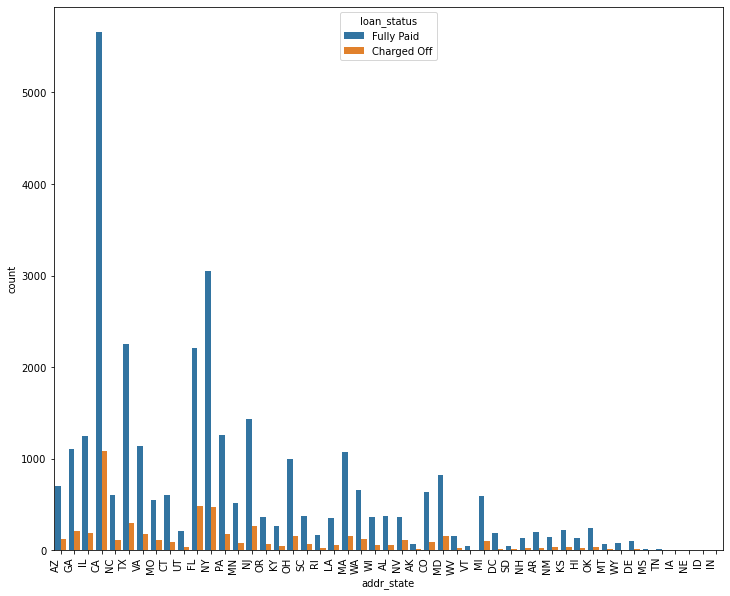

In [1484]:
# Count of loan applications from different US states
fig = sns.countplot(data=df, 
                    x='addr_state', 
                    hue='loan_status')

# Rotating the x-axis labels for better readability
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=90, 
                    ha="right")
plt.show()

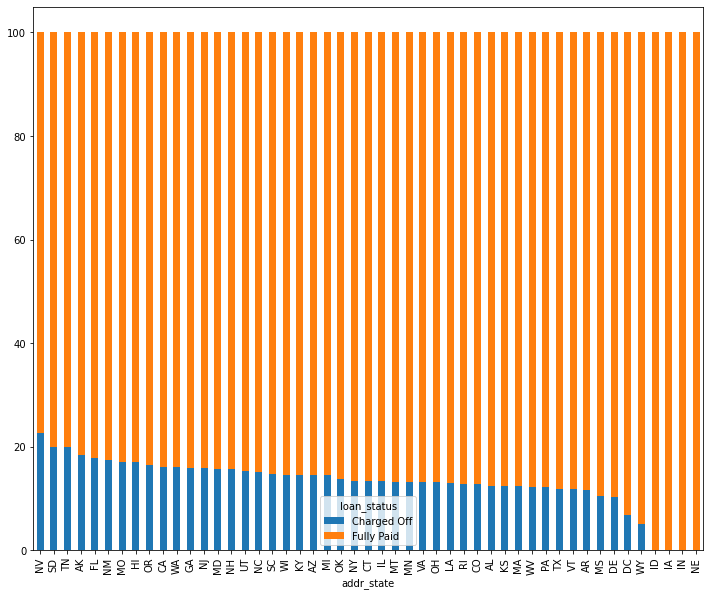

In [1488]:
# Calculate the percentage of defaulted borrowers and fully paid borrowers in each state
df_addr_state = df_addr_state.apply(lambda x: x/x.sum() * 100, axis=1)

# Sorting the rows in decreasing order of charged off borrowers
df_addr_state.sort_values(by=['Charged Off', 'Fully Paid'], 
                          ascending=False, 
                          inplace=True)

df_addr_state.plot.bar(stacked=True)

plt.show()

**Nevada (ND), South Dakota(SD), TN(Tennessee)** account for top three states with high loan defaulters.

## Correlating numeric variables with target variables

We shall use grades and loan_status as the target variables and assign integers for each of those categories

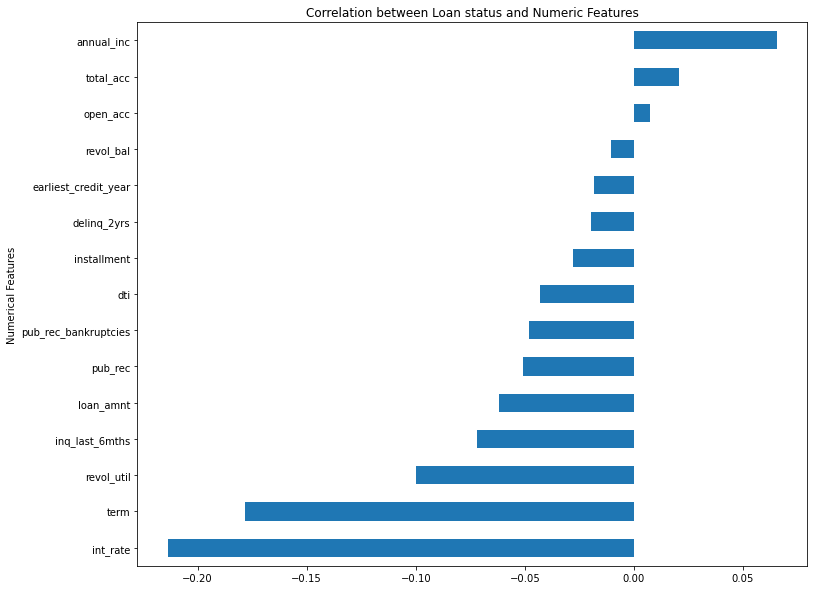

In [1206]:
# Mapping loan_status with integer values
df['loan_status'] = df['loan_status'].map({ 'Charged Off': 0, 'Fully Paid': 1 })

# Dropping the loan_status column from correlation dataframe
corr_mat_by_loan_status=df.corr()['loan_status'].drop('loan_status').sort_values()

# Plotting horizontal bar plot for each numerical features
corr_mat_by_loan_status.plot.barh(title="Correlation between Loan status and Numeric Features", 
                   ylabel='Correlation', 
                   xlabel='Numerical Features')

plt.show()

## Summary

From the dataset which we got, we performed data cleaning to remove all irrelevant rows, cleaned up the rows containing missing values, dropped the columns which had all the values missing and those which are not useful for our analysis. Post that, we removed few outliers from the dataset. Once we had a clean data, we started analysing each numeric attribute with the target variables like grade, sub_grade, loan_status, etc and found some useful insights. Lending Club can use these insights to make smarter decisions whether to approve the loan or reject it.